### **************************************** BİTİRME ÇALIŞMASI *******************************************
####                        AMAÇ : Kalp hastalıkları veri setinde başarılı modeller elde etmektir.
####                        UYGULAMA:

#### VERİ ÖN İŞLEME 
##### 1-) NÜMERİK FORMATA DÖNÜŞTÜRME TEKNİKLERİ
a-) Label Encoding 
b-) One-Hot Encoding  

c-) Hibrit Yöntem
##### 2-) DÖNÜŞÜM TEKNİKLERİ
a-) Power Transform
b-) Logaritmik 
c-) Karekök
d-) Hibrit Yöntem
##### 2-) STANDARDİZASYON TEKNİKLERİ
a-) StandardScaler
b-) Min-Max 
c-) RobustScaler
d-) Hibrit Yöntem
#### ML MODELLERİ UYGULANMASI
1-)  KNN
2-)  Random Forest (Rastgele Orman)
3-)  Lojistik Regresyon
4-)  SVM (Karar Destek Makineleri)
5-)  Decision Tree (Karar Ağaçları)
6-)  Naive Bayes
7-)  XGBoost
8-)  CatBoost
9-)  AdaBoost
10-) VotingClassifier 
11-) VotingClassifier


#### BAŞARISI DÜŞÜK MODELLERİN BAŞARISINI ARTTIRMAYA YÖNELİK ÇALIŞMALAR
##### 1-) SMOTE ile veri setindeki sınıf sayısını dengelemek
##### 2-) Özellik mühendisliği uygulamak

#### SHAP İLE BAŞARILI MODELLERİN YORUMLANMASI

### 1- EDA 

#### Veri setini okumak

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/PC/Desktop/heart_disease.zip")

In [2]:
df = data.copy()

In [6]:
df["sex"].count()

1025

In [4]:
df["age"].min()

29

C:\Users\PC\AppData\Local\Temp\ipykernel_10484\3311659731.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis') # İstediğiniz renk paletini seçebilirsiniz


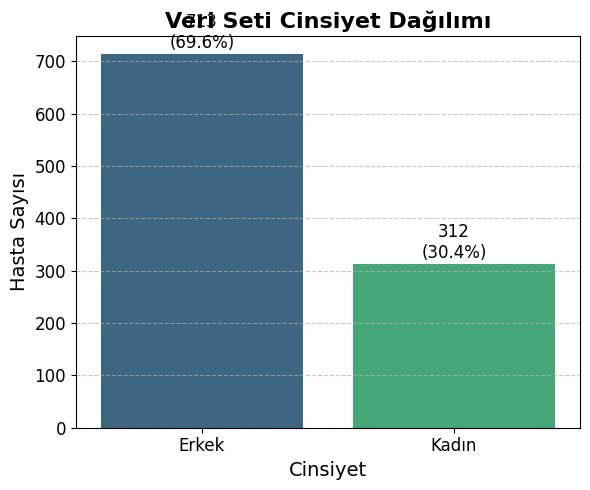

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['sex_label'] = df['sex'].map({0: 'Kadın', 1: 'Erkek'})

# Cinsiyet dağılımını hesaplama
sex_counts = df['sex_label'].value_counts()
sex_percentages = df['sex_label'].value_counts(normalize=True) * 100

# Grafiği oluşturma
plt.figure(figsize=(6, 5)) # Poster için uygun boyutta ayarlayın
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis') # İstediğiniz renk paletini seçebilirsiniz

# Sütunların üzerine sayıları ve yüzdeleri ekleme
for i, (count, percentage) in enumerate(zip(sex_counts.values, sex_percentages.values)):
    plt.text(i, count + 5, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Veri Seti Cinsiyet Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Cinsiyet', fontsize=14)
plt.ylabel('Hasta Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Arka plan ızgarası ekleyebiliriz
plt.tight_layout() # Grafiğin sıkışmamasını sağlar

# Grafiği kaydetme (Yüksek çözünürlükte kaydedin!)
plt.savefig('cinsiyet_dagilimi_sutun_grafik.png', dpi=300, bbox_inches='tight') # DPI değeri çözünürlüğü belirler

plt.show()

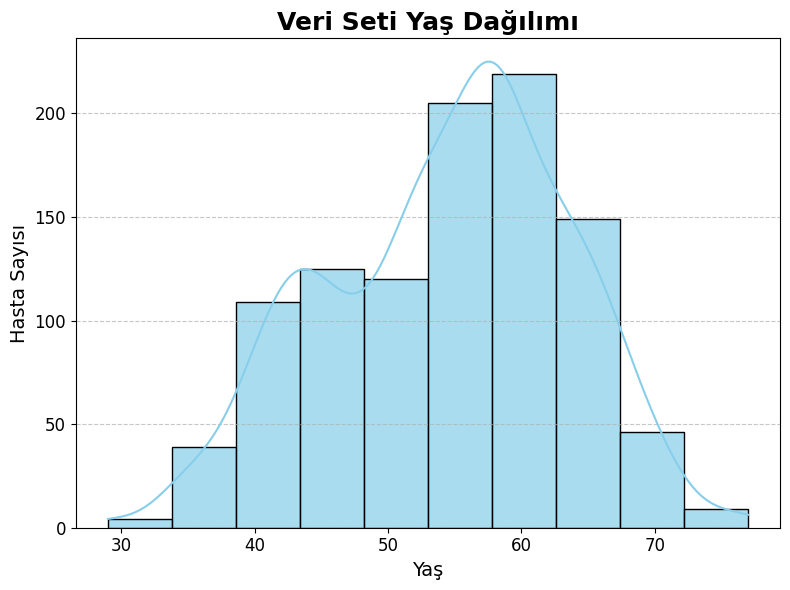

En Küçük Yaş: 29
En Büyük Yaş: 77
Yaş Ortalaması: 54.43


In [9]:
# Yaş dağılımı için histogram ve yoğunluk grafiği oluşturma
plt.figure(figsize=(8, 6)) # Poster için uygun boyutta ayarlayın

# Histogram
sns.histplot(df['age'], bins=10, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
# bins: kaç tane yaş aralığı (sütun) olacağını belirler
# kde=True: histogramın üzerine yoğunluk eğrisi (density plot) ekler

plt.title('Veri Seti Yaş Dağılımı', fontsize=18, fontweight='bold')
plt.xlabel('Yaş', fontsize=14)
plt.ylabel('Hasta Sayısı', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Arka plan ızgarası ekleyebiliriz
plt.tight_layout() # Grafiğin sıkışmamasını sağlar

# Grafiği yüksek çözünürlükte kaydetme
plt.savefig('yas_dagilimi_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

# İstatistiksel bilgiler (metin için)
min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()

print(f"En Küçük Yaş: {min_age}")
print(f"En Büyük Yaş: {max_age}")
print(f"Yaş Ortalaması: {mean_age:.2f}") # İki ondalık basamak

In [5]:
df["age"].max()

77

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
df.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [5]:
print("Veri setinin satır ve sütun sayısı: " , df.shape)

Veri setinin satır ve sütun sayısı:  (1025, 14)


In [6]:
df["age"].describe().T

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [6]:
df["trestbps"].describe().T

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

In [7]:
df["chol"].describe().T

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

In [8]:
df["thalach"].describe().T

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

In [10]:
df["oldpeak"].describe().T

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
print("Veri setindeki boş değerler: \n", df.isnull().sum())

Veri setindeki boş değerler: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [8]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

In [9]:
#value_counts_dict = {col: df[col].value_counts() for col in df.columns}
value_counts_dict = {col: df[col].value_counts() for col in df.columns if df[col].nunique() <= 10}
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"\n {col} sütunu:")
    if unique_count <= 10:
        print(df[col].value_counts())
    else:
        print(f"Sınıf sayısı {unique_count} olduğu için 10'dan fazladır, benzersiz değerler yazdırılmadı.")



 age sütunu:
Sınıf sayısı 41 olduğu için 10'dan fazladır, benzersiz değerler yazdırılmadı.

 sex sütunu:
sex
1    713
0    312
Name: count, dtype: int64

 cp sütunu:
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

 trestbps sütunu:
Sınıf sayısı 49 olduğu için 10'dan fazladır, benzersiz değerler yazdırılmadı.

 chol sütunu:
Sınıf sayısı 152 olduğu için 10'dan fazladır, benzersiz değerler yazdırılmadı.

 fbs sütunu:
fbs
0    872
1    153
Name: count, dtype: int64

 restecg sütunu:
restecg
1    513
0    497
2     15
Name: count, dtype: int64

 thalach sütunu:
Sınıf sayısı 91 olduğu için 10'dan fazladır, benzersiz değerler yazdırılmadı.

 exang sütunu:
exang
0    680
1    345
Name: count, dtype: int64

 oldpeak sütunu:
Sınıf sayısı 40 olduğu için 10'dan fazladır, benzersiz değerler yazdırılmadı.

 slope sütunu:
slope
1    482
2    469
0     74
Name: count, dtype: int64

 ca sütunu:
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

 thal sütunu:
t

In [10]:
df.groupby("sex").agg({
    "age": ["mean", "median", "sum"],
    "chol": ["mean", "median", "sum"],
    "trestbps": ["mean", "median", "sum"],
    "target": "mean"   # Kalp krizi olma oranı (target ortalaması)
})

age                      chol                   trestbps         \
          mean median    sum        mean median     sum        mean median   
sex                                                                          
0    55.849359   57.0  17425  261.455128  254.0   81574  133.701923  132.0   
1    53.814867   55.0  38370  239.237027  234.0  170576  130.697055  130.0   

              target  
       sum      mean  
sex                   
0    41715  0.724359  
1    93187  0.420757

In [11]:
df.groupby(["sex", "cp"]).agg({
    "age": "mean",
    "target": "mean"
})

age    target
sex cp                     
0   0   57.390977  0.436090
    1   51.982456  0.877193
    2   55.137615  0.963303
    3   63.000000  1.000000
1   0   55.197802  0.175824
    1   50.863636  0.763636
    2   52.508571  0.651429
    3   54.593750  0.593750

In [12]:
df.groupby("target").agg({
    "age": "mean",
    "chol": "mean"
})

age        chol
target                       
0       56.569138  251.292585
1       52.408745  240.979087

In [13]:
def multi_agg(df, group_cols, agg_cols, agg_funcs):
    """
    group_cols: gruplanacak sütunlar listesi
    agg_cols: özetlenecek sütunlar listesi
    agg_funcs: uygulanacak fonksiyonlar listesi (örn: ["mean", "sum"])
    """
    agg_dict = {col: agg_funcs for col in agg_cols}
    result = df.groupby(group_cols).agg(agg_dict)
    return result

# Kullanım örneği:
multi_agg(df, group_cols=["sex", "cp"], agg_cols=["age", "chol", "target"], agg_funcs=["mean", "sum"])

age               chol           target     
             mean    sum        mean    sum      mean  sum
sex cp                                                    
0   0   57.390977   7633  266.616541  35460  0.436090   58
    1   51.982456   2963  253.912281  14473  0.877193   50
    2   55.137615   6010  260.889908  28437  0.963303  105
    3   63.000000    819  246.461538   3204  1.000000   13
1   0   55.197802  20092  243.920330  88787  0.175824   64
    1   50.863636   5595  239.927273  26392  0.763636   84
    2   52.508571   9189  230.554286  40347  0.651429  114
    3   54.593750   3494  235.156250  15050  0.593750   38

          X         Y   method alternative     n         r           CI95%  \
0       age      chol  pearson   two-sided  1025  0.219823    [0.16, 0.28]   
1       age  trestbps  pearson   two-sided  1025  0.271121    [0.21, 0.33]   
2       age   thalach  pearson   two-sided  1025 -0.390227  [-0.44, -0.34]   
3       age    target  pearson   two-sided  1025 -0.229324  [-0.29, -0.17]   
4      chol  trestbps  pearson   two-sided  1025  0.127977    [0.07, 0.19]   
5      chol   thalach  pearson   two-sided  1025 -0.021772   [-0.08, 0.04]   
6      chol    target  pearson   two-sided  1025 -0.099966  [-0.16, -0.04]   
7  trestbps   thalach  pearson   two-sided  1025 -0.039264    [-0.1, 0.02]   
8  trestbps    target  pearson   two-sided  1025 -0.138772   [-0.2, -0.08]   
9   thalach    target  pearson   two-sided  1025  0.422895    [0.37, 0.47]   

          p-unc       BF10     power  
0  1.107920e-12  3.746e+09  1.000000  
1  9.961994e-19   3.31e+15  1.000000  
2  1.273827e-38  1.657e+

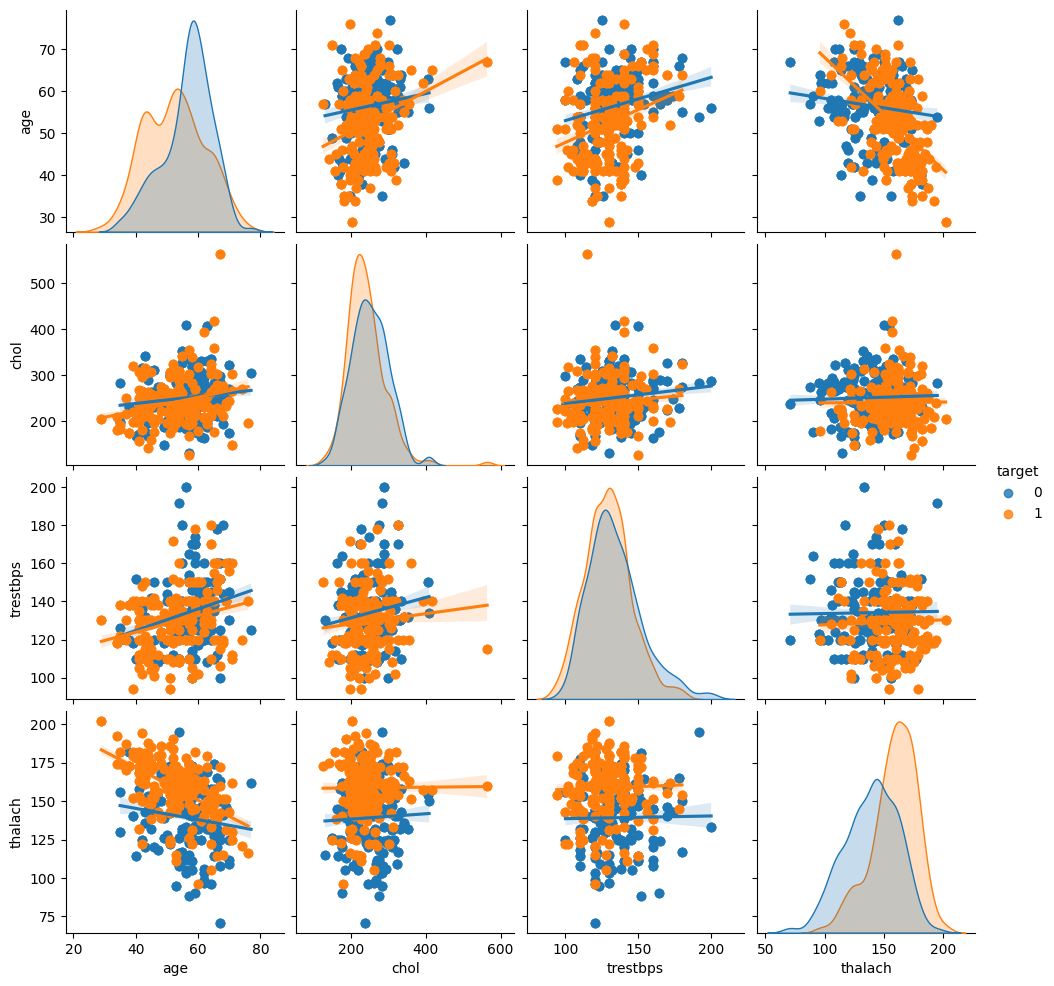

In [14]:
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisi ve p-değerleri
corr = pg.pairwise_corr(df[["age", "chol", "trestbps", "thalach", "target"]], method="pearson")
print(corr)

# Daha gelişmiş visual için:
sns.pairplot(df, vars=["age", "chol", "trestbps", "thalach"], hue="target", kind="reg")
plt.show()


<Figure size 300x200 with 0 Axes>

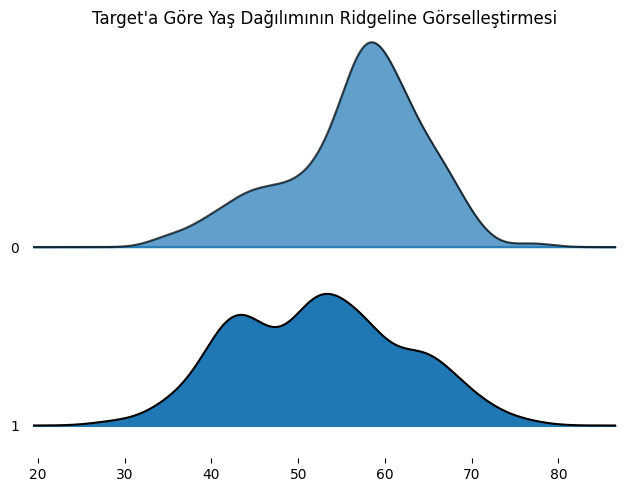

In [15]:
# Ridgeline Plot (Joyplot) 
import joypy
plt.figure(figsize=(3,2))
joypy.joyplot(df, by="target", column="age", kind="kde", fill=True, fade=True)
plt.title("Target'a Göre Yaş Dağılımının Ridgeline Görselleştirmesi")
plt.show()


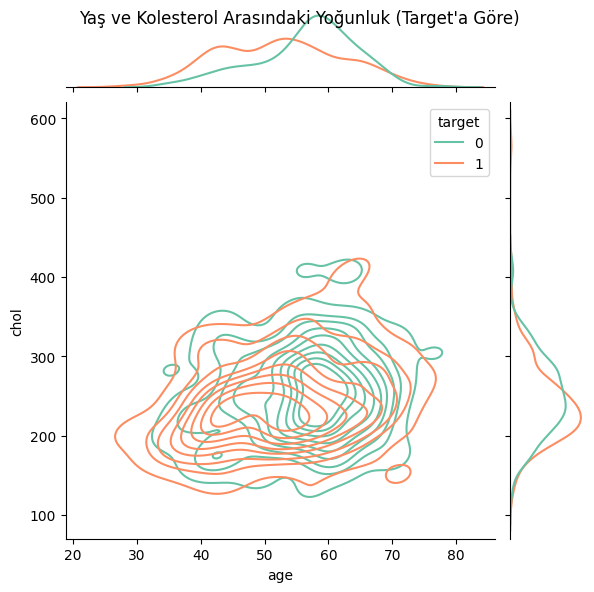

In [16]:
#Join Plot 
sns.jointplot(data=df, x="age", y="chol", kind="kde", hue="target", palette="Set2")
plt.suptitle("Yaş ve Kolesterol Arasındaki Yoğunluk (Target'a Göre)")
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_21936\2024959436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="target", y="chol", data=df, palette="coolwarm")
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


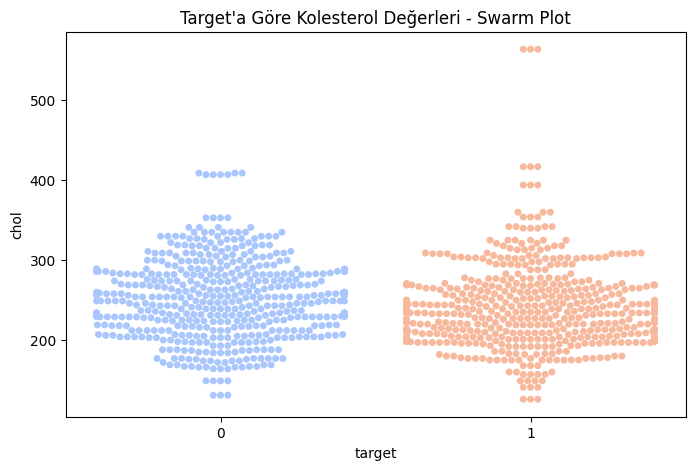

In [17]:
#Swarm Plot
plt.figure(figsize=(8,5))
sns.swarmplot(x="target", y="chol", data=df, palette="coolwarm")
plt.title("Target'a Göre Kolesterol Değerleri - Swarm Plot")
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_21936\2686664281.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="target", y="age", data=df, palette="muted")


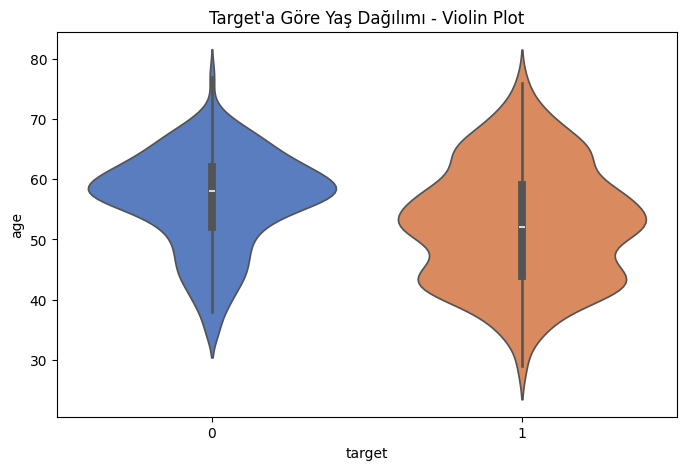

In [18]:
#Violin Plot
plt.figure(figsize=(8,5))
sns.violinplot(x="target", y="age", data=df, palette="muted")
plt.title("Target'a Göre Yaş Dağılımı - Violin Plot")
plt.show()

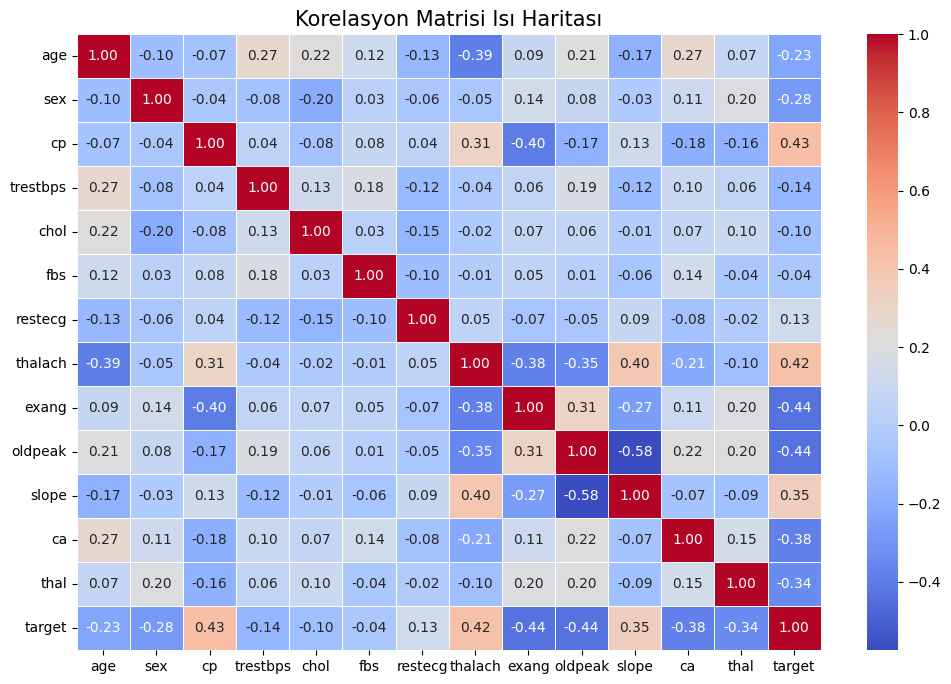

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini hesapla
corr_matrix = df.corr(numeric_only=True)

# Isı haritasını çiz
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelasyon Matrisi Isı Haritası", fontsize=15)
plt.show()


##### Aykırı Değer Analizi

In [24]:
def outlier_summary(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower) | (df[col] > upper)
        outlier_count = outlier_mask.sum()
        if outlier_count > 0:
            outliers[col] = outlier_count
            print(f"{col}: {outlier_count} aykırı değer bulundu.")
    return outliers

num_cols = df.select_dtypes(include=["int", "float"]).columns
outlier_summary(df, num_cols)

trestbps: 30 aykırı değer bulundu.
chol: 16 aykırı değer bulundu.
fbs: 153 aykırı değer bulundu.
thalach: 4 aykırı değer bulundu.
oldpeak: 7 aykırı değer bulundu.
ca: 87 aykırı değer bulundu.
thal: 7 aykırı değer bulundu.


{'trestbps': 30,
 'chol': 16,
 'fbs': 153,
 'thalach': 4,
 'oldpeak': 7,
 'ca': 87,
 'thal': 7}

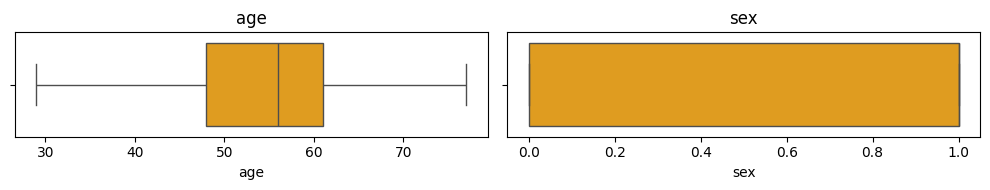

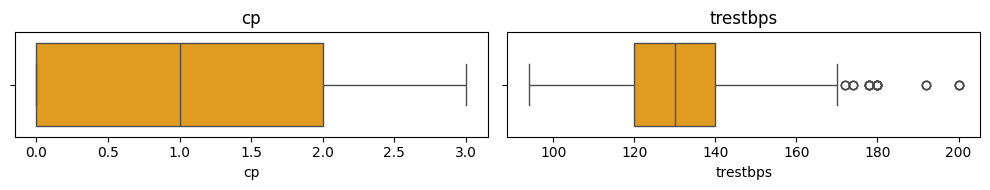

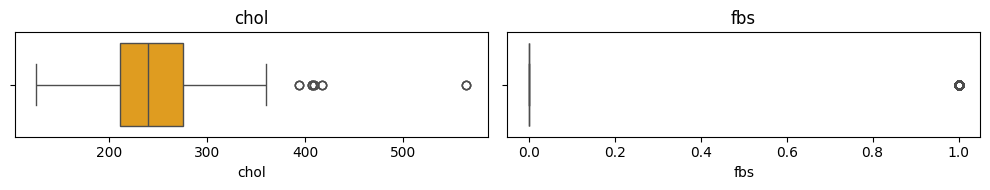

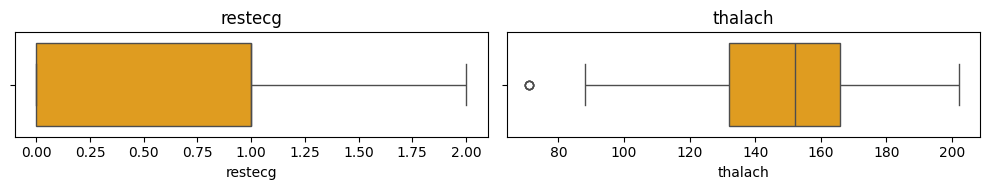

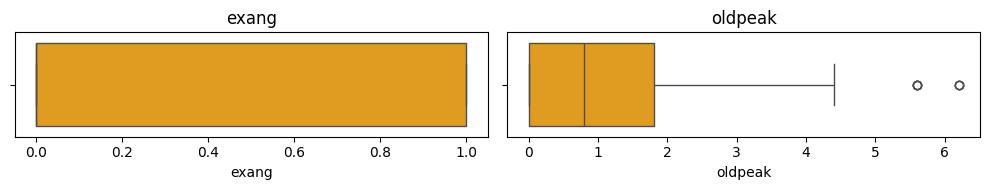

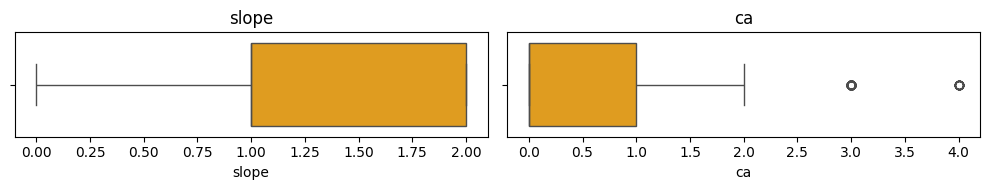

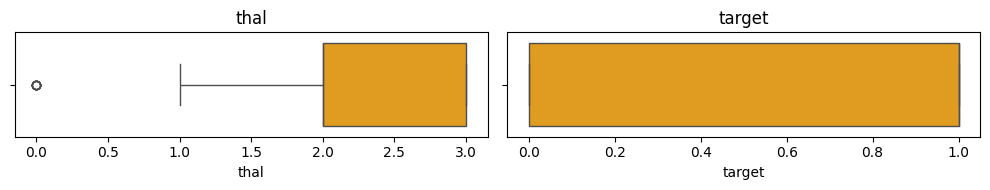

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal sütunları otomatik bul
num_cols = df.select_dtypes(include=["int", "float"]).columns

# Boxplot'ları 2 sütunlu olarak küçük küçük göster
def plot_boxplots_2cols(data, columns):
    n = len(columns)
    for i in range(0, n, 2):  # her seferinde 2 sütun al
        cols_pair = columns[i:i+2]
        fig, axes = plt.subplots(1, len(cols_pair), figsize=(10, 2))  # genişliği azaltabilirsin
        if len(cols_pair) == 1:
            axes = [axes]  # tek grafikse listeye sar
        for ax, col in zip(axes, cols_pair):
            sns.boxplot(x=data[col], ax=ax, color="orange")
            ax.set_title(f"{col}")
        plt.tight_layout()
        plt.show()

# Kullanım
plot_boxplots_2cols(df, num_cols)


In [26]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### 2- Veri Ön İşleme 

#### Nümerik gibi görünen kategorik değişkenlerin sayısallaştırması : Burada Label Encoding, One-Hot Encoding kıyaslaması yapılması planlanmaktadır. 

#### Nümerik gibi görünen kategorik sütunların sayısı 7'dir. ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

### İncelenecek 3 durumun özeti:
### 1-) 7 sütun içinde Label Encoding 
### 2-) 7 sütun içinde One-Hot Encoding
### 3-) Çalışmayı yapan kişinin önerisiyle Label Encoding, One-Hot Encoding yöntemlerinin hibrit kullanılması


* ##### df1 — Label Encoding uygulanmış hali

* ##### df2 — One-Hot Encoding uygulanmış hali (bool -> int dönüştürülmüş)

* ##### df3 — Hibrit (Label + One-Hot Encoding karışık) hali (bool -> int dönüştürülmüş)

#### Veri setini 3 ayrı şekilde kopyalıyoruz.

In [7]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#### 1-) 7 sütunun tamamına Label Encoding uygulanması

In [4]:
from sklearn.preprocessing import LabelEncoder

categorical_cols1 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

le = LabelEncoder()

for col in categorical_cols1:
    df1[col] = le.fit_transform(df1[col])

print(df1.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


#### 2-) 7 sütunun tamamına OHE uygulanması

In [5]:
categorical_cols2 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

df2 = pd.get_dummies(df2, columns=categorical_cols2)
# True/False sütunları 0/1 yapmak için tüm sütunları int'e çevirelim
df2 = df2.astype({col: 'int' for col in df2.columns if df2[col].dtype == 'bool'})

print("One-Hot Encoding sonrası df2 sütun sayısı:", df2.shape[1])
print(df2.head())

One-Hot Encoding sonrası df2 sütun sayısı: 27
   age  trestbps  chol  thalach  oldpeak  ca  target  sex_0  sex_1  cp_0  ...  \
0   52       125   212      168      1.0   2       0      0      1     1  ...   
1   53       140   203      155      3.1   0       0      0      1     1  ...   
2   70       145   174      125      2.6   0       0      0      1     1  ...   
3   61       148   203      161      0.0   1       0      0      1     1  ...   
4   62       138   294      106      1.9   3       0      1      0     1  ...   

   restecg_2  exang_0  exang_1  slope_0  slope_1  slope_2  thal_0  thal_1  \
0          0        1        0        0        0        1       0       0   
1          0        0        1        1        0        0       0       0   
2          0        0        1        1        0        0       0       0   
3          0        1        0        0        0        1       0       0   
4          0        1        0        0        1        0       0       0   

   t

#### 2-) 7 sütun için hibrit model oluşturulması (Label Encoding + OHE)

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunlar
categorical_cols3 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# 2 sınıflı ve çok sınıflı sütunları ayırıyoruz
two_class_cols = [col for col in categorical_cols3 if df3[col].nunique() == 2]
multi_class_cols = [col for col in categorical_cols3 if df3[col].nunique() > 2]

# Label Encoding için nesne oluştur
le = LabelEncoder()

# Label Encoding: sadece 2 sınıflı sütunlar
for col in two_class_cols:
    df3[col] = le.fit_transform(df3[col])

# One-Hot Encoding: çok sınıflı sütunlar
df3 = pd.get_dummies(df3, columns=multi_class_cols)
# True/False sütunları 0/1 yapmak için tüm sütunları int'e çevirelim
df3 = df3.astype({col: 'int' for col in df3.columns if df3[col].dtype == 'bool'})


print("Hibrit encoding sonrası df3 sütun sayısı:", df3.shape[1])
print(df3.head())

Hibrit encoding sonrası df3 sütun sayısı: 24
   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  ...  \
0   52    1       125   212    0      168      0      1.0   2       0  ...   
1   53    1       140   203    1      155      1      3.1   0       0  ...   
2   70    1       145   174    0      125      1      2.6   0       0  ...   
3   61    1       148   203    0      161      0      0.0   1       0  ...   
4   62    0       138   294    1      106      0      1.9   3       0  ...   

   restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  thal_0  thal_1  \
0          0          1          0        0        0        1       0       0   
1          1          0          0        1        0        0       0       0   
2          0          1          0        1        0        0       0       0   
3          0          1          0        0        0        1       0       0   
4          0          1          0        0        1        0       0       0   


### 2- MAKİNE ÖĞRENMESİ ALGORİTMALARI KULLANARAK PERFORMANS KARŞILAŞTIRMASI YAPMAK VE ÇALIŞMALARIN DEVAMI İÇİN UYGUN VERİSETİNİ SEÇMEK
Bu bölümde 3 farklı işlem yapılmış veri setleriyle makine öğrenmesi modellerinin yapılması planlanmaktadır.



### 1-) df1 veri seti için :

#### Veriseti eğitim ve test olarak ayrılıyor.

In [8]:
from sklearn.model_selection import train_test_split

X = df1.drop("target", axis=1)  # Bağımsız değişkenler
y = df1["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1.1 Lojistik Regresyon 
#### 1.2 Random Forest
#### 1.3 K-NEAREST NEİGHBORS (KNN)
#### 1.4 SUPPORT VECTOR MACHİNE (SVM)
#### 1.5 DECİSİON TREE
#### 1.6 NAİVE BAYES

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       102
           1       0.83      0.94      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       102
           1       0.90      0.91      0.90       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.795122   0.756303  0.873786  0.810811
1           Random Forest  0.873171   0.829060  0.941748  0.881818
2     K-Nearest Neighbors  0.902439   0.895238  0.912621  0.903846
3  Support Vector Machine  0.682927   0.661017  0.757282  0.705882
4           Decision Tree  0.843902   0.784000  0.951456  0.859649
5             Naive Bayes  0.800000   0.754098  0.893204  0.817778


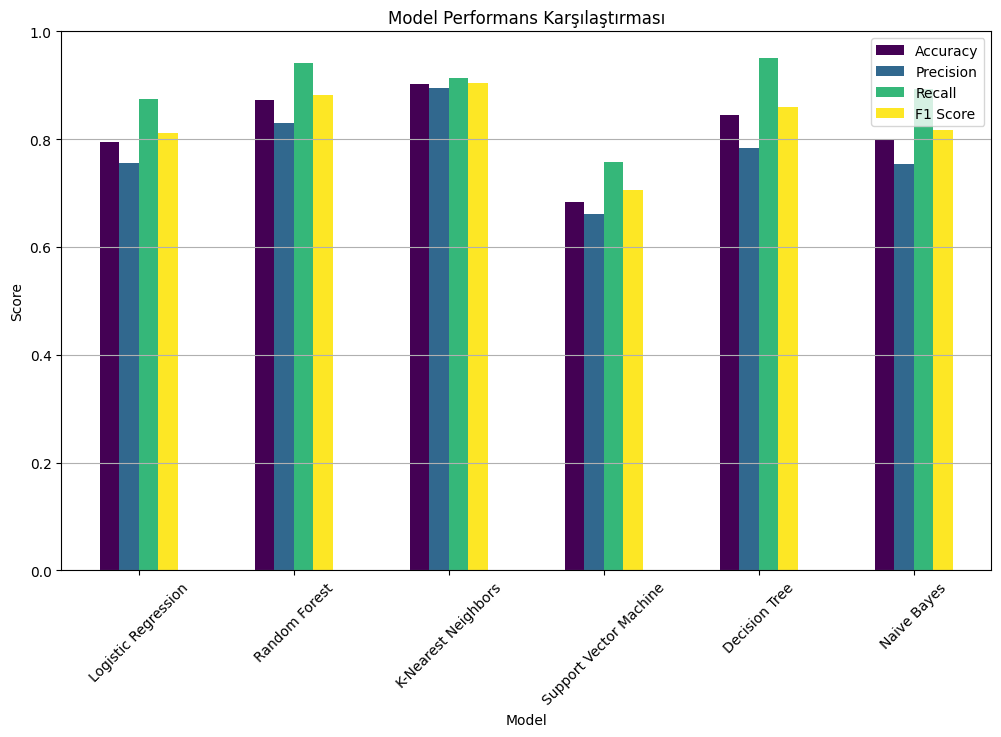

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


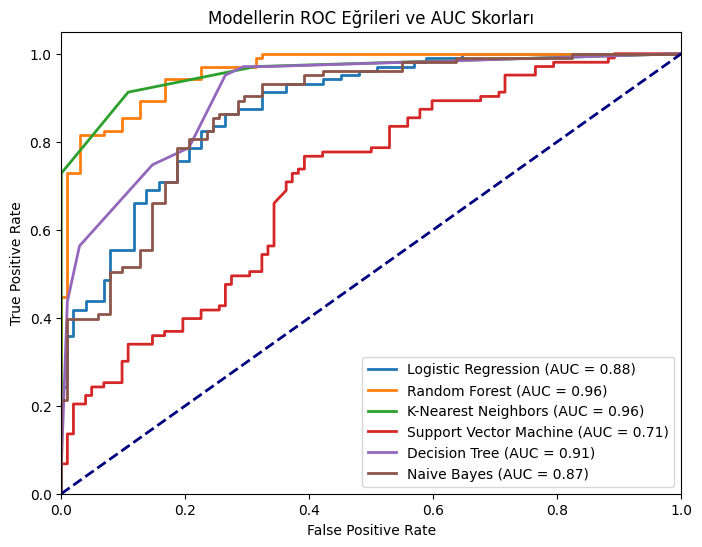

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict_proba ile pozitif sınıf olasılıklarını alıyoruz
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Bazı modeller predict_proba() desteklemez, decision_function kullanabiliriz
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri ve AUC Skorları')
plt.legend(loc='lower right')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': list(range(1, 16))}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("En iyi k değeri:", grid_search.best_params_['n_neighbors'])
print("En iyi doğruluk:", grid_search.best_score_)

En iyi k değeri: 1
En iyi doğruluk: 0.9719512195121951


### 2-) df2 veri seti için :

#### Veriseti eğitim ve test olarak ayrılıyor.

In [22]:
from sklearn.model_selection import train_test_split

X = df2.drop("target", axis=1)  # Bağımsız değişkenler
y = df2["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.1 Lojistik Regresyon 
#### 2.2 Random Forest
#### 2.3 K-NEAREST NEİGHBORS (KNN)
#### 2.4 SUPPORT VECTOR MACHİNE (SVM)
#### 2.5 DECİSİON TREE
#### 2.6 NAİVE BAYES

In [23]:
# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       102
           1       0.77      0.89      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       102
           1       0.83      0.94      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       102
           1       0.90      0.91      0.90       103

    accuracy                

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.814634   0.773109  0.893204  0.828829
1           Random Forest  0.873171   0.829060  0.941748  0.881818
2     K-Nearest Neighbors  0.902439   0.895238  0.912621  0.903846
3  Support Vector Machine  0.678049   0.658120  0.747573  0.700000
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.770732   0.712121  0.912621  0.800000


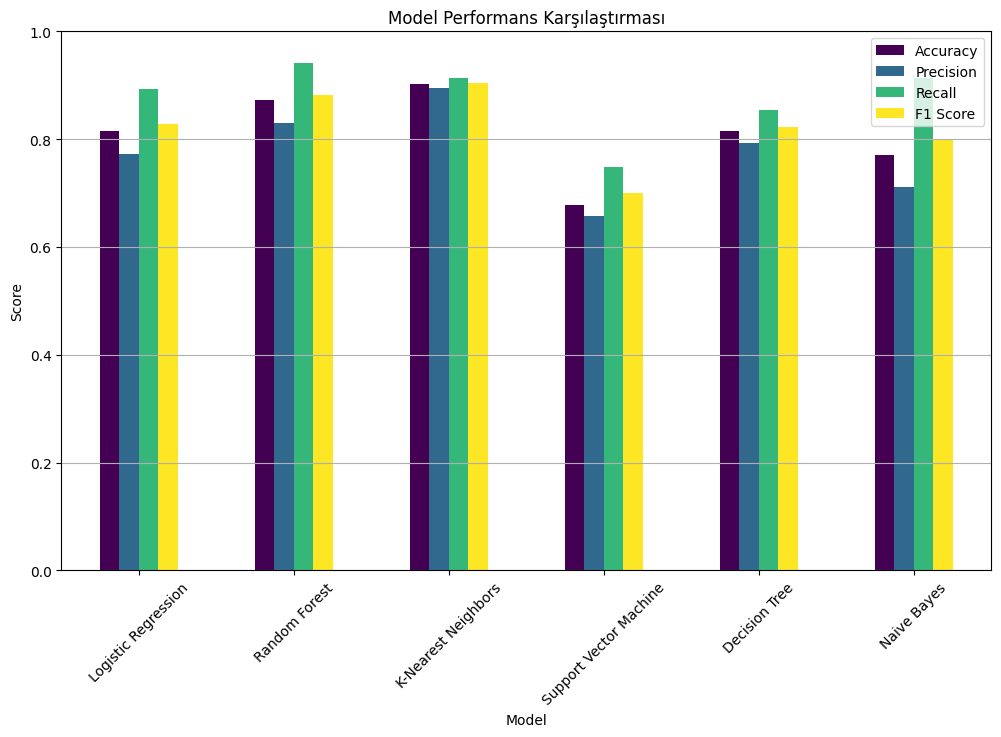

In [24]:
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


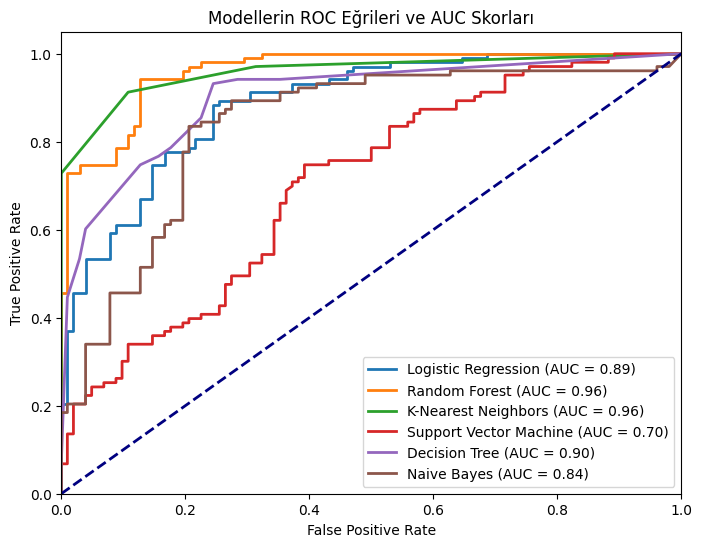

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict_proba ile pozitif sınıf olasılıklarını alıyoruz
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Bazı modeller predict_proba() desteklemez, decision_function kullanabiliriz
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri ve AUC Skorları')
plt.legend(loc='lower right')
plt.show()

### 3-) df3 veri seti için :

#### Veriseti eğitim ve test olarak ayrılıyor.

#### 1.1 Lojistik Regresyon 
#### 1.2 Random Forest
#### 1.3 K-NEAREST NEİGHBORS (KNN)
#### 1.4 SUPPORT VECTOR MACHİNE (SVM)
#### 1.5 DECİSİON TREE
#### 1.6 NAİVE BAYES

#### Çalışmalara bu veri seti üzerinde devam edileceği için kopyası alınıyor. 

In [9]:
df4 = df3.copy()

In [6]:
from sklearn.model_selection import train_test_split

X = df3.drop("target", axis=1)  # Bağımsız değişkenler
y = df3["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       102
           1       0.77      0.89      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       102
           1       0.90      0.91      0.90       103

    accuracy                

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.814634   0.773109  0.893204  0.828829
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.902439   0.895238  0.912621  0.903846
3  Support Vector Machine  0.678049   0.658120  0.747573  0.700000
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.775610   0.717557  0.912621  0.803419


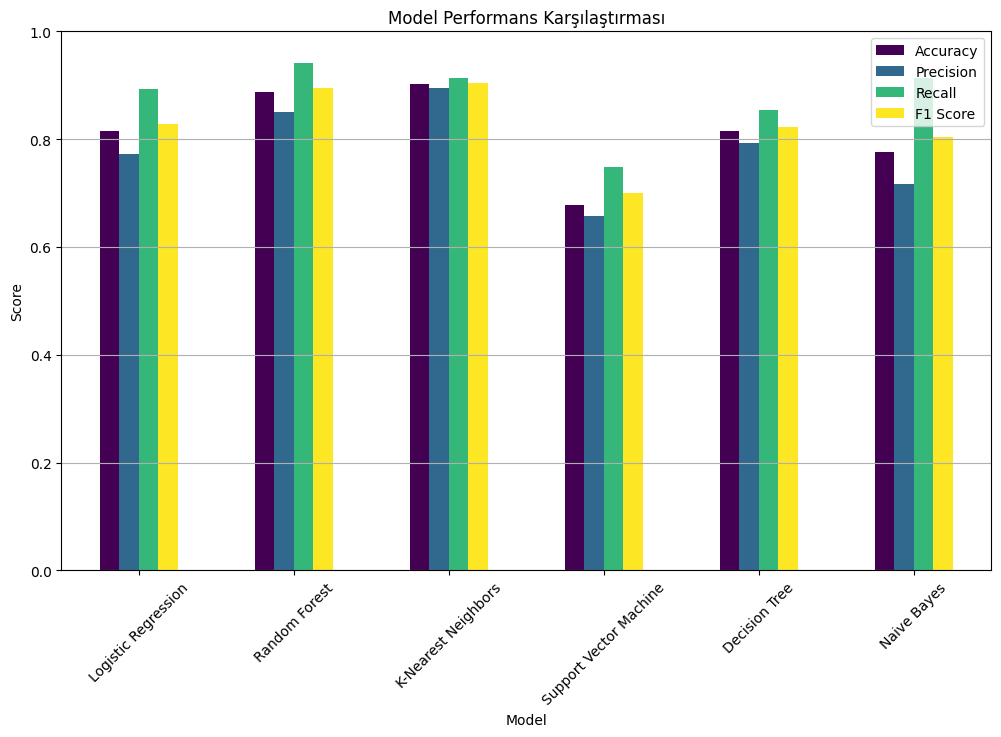

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


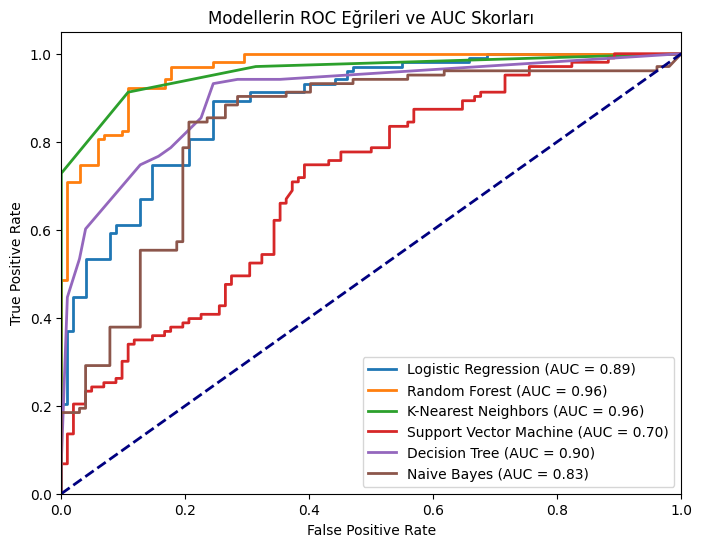

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict_proba ile pozitif sınıf olasılıklarını alıyoruz
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Bazı modeller predict_proba() desteklemez, decision_function kullanabiliriz
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri ve AUC Skorları')
plt.legend(loc='lower right')
plt.show()

#### Veri Dönüşümü İşlemi:
##### Bu bölümde 3 tane çok sık kullanılan veri dönüştürme yöntemi üzerinde çalışmalar yapılması planlanmaktadır.
##### 1-) Güç Dönüşümleri (Power Transforms)
##### 2-) Logaritmik Dönüşüm ( Log Transformation)
##### 3-) Karekök Dönüşümü (Square Root Transformation)
##### 4-) Hibrit Model

In [10]:
df4_1 = df4.copy()
df4_2 = df4.copy()
df4_3 = df4.copy()
df4_4 = df4.copy()

#### Hibrit modelde sütun üzerinde özel işlemler yapabilmek için işlem yapılacak sütunlar yakından inceleniyor.

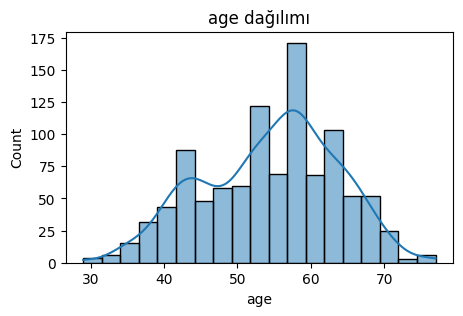

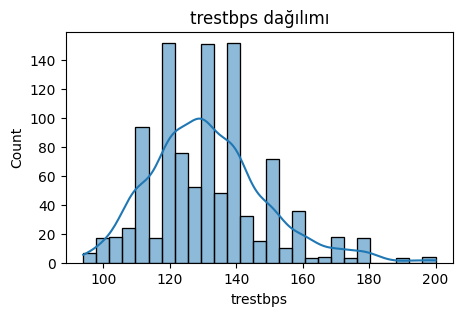

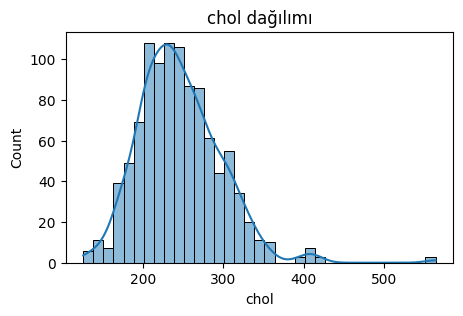

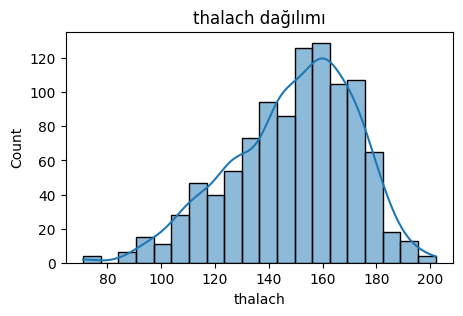

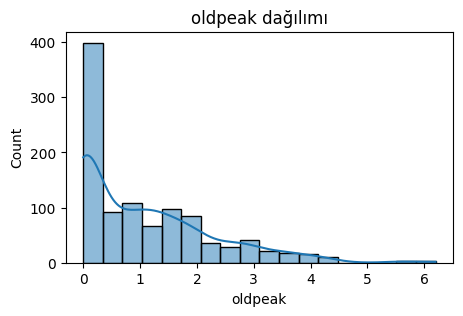

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in columns:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} dağılımı')
    plt.show()

##### 1-) Güç Dönüşümleri (Power Transforms)

In [11]:
from sklearn.preprocessing import PowerTransformer

# Dönüştürülecek sütunlar
columns_to_transform = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Power Transformer nesnesi (Yeo-Johnson yöntemi)
pt = PowerTransformer(method='yeo-johnson')

# Sadece seçilen sütunlara dönüşüm uygula
df4_1[columns_to_transform] = pt.fit_transform(df4_1[columns_to_transform])

# İlk 5 satırı kontrol edelim
print(df4_1[columns_to_transform].head())

        age  trestbps      chol   thalach   oldpeak
0 -0.313680 -0.291178 -0.622292  0.823327  0.324812
1 -0.204133  0.579851 -0.838764  0.178591  1.454601
2  1.819466  0.835075 -1.615636 -1.080136  1.276061
3  0.711067  0.980980 -0.838764  0.468595 -1.174036
4  0.830193  0.473267  0.979304 -1.716360  0.955054


In [8]:
df4_1.head()

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0 -0.313680    1 -0.291178 -0.622292    0  0.823327      0  0.324812   2   
1 -0.204133    1  0.579851 -0.838764    1  0.178591      1  1.454601   0   
2  1.819466    1  0.835075 -1.615636    0 -1.080136      1  1.276061   0   
3  0.711067    1  0.980980 -0.838764    0  0.468595      0 -1.174036   1   
4  0.830193    0  0.473267  0.979304    1 -1.716360      0  0.955054   3   

   target  ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  \
0       0  ...          0          1          0        0        0        1   
1       0  ...          1          0          0        1        0        0   
2       0  ...          0          1          0        1        0        0   
3       0  ...          0          1          0        0        0        1   
4       0  ...          0          1          0        0        1        0   

   thal_0  thal_1  thal_2  thal_3  
0       0       0       0       1  
1       0       0       0       1  
2       0       0       0       1  
3       0       0       0       1  
4       0       0       1       0  

[5 rows x 24 columns]

##### 2-) Logaritmik Dönüşüm ( Log Transformation)

In [9]:
import numpy as np

columns_to_transform = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Log dönüşümü için önce negatif veya sıfır değer var mı kontrol et
for col in columns_to_transform:
    min_val = df4_2[col].min()
    if min_val <= 0:
        # Log dönüşümü için pozitif yapalım (örneğin +1 - min_val)
        df4_2[col] = np.log(df4_2[col] - min_val + 1)
    else:
        df4_2[col] = np.log(df4_2[col])

# Sonuçları kontrol edelim
print(df4_2[columns_to_transform].head())

        age  trestbps      chol   thalach   oldpeak
0  3.951244  4.828314  5.356586  5.123964  0.693147
1  3.970292  4.941642  5.313206  5.043425  1.410987
2  4.248495  4.976734  5.159055  4.828314  1.280934
3  4.110874  4.997212  5.313206  5.081404  0.000000
4  4.127134  4.927254  5.683580  4.663439  1.064711


In [10]:
df4_2.head()

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0  3.951244    1  4.828314  5.356586    0  5.123964      0  0.693147   2   
1  3.970292    1  4.941642  5.313206    1  5.043425      1  1.410987   0   
2  4.248495    1  4.976734  5.159055    0  4.828314      1  1.280934   0   
3  4.110874    1  4.997212  5.313206    0  5.081404      0  0.000000   1   
4  4.127134    0  4.927254  5.683580    1  4.663439      0  1.064711   3   

   target  ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  \
0       0  ...          0          1          0        0        0        1   
1       0  ...          1          0          0        1        0        0   
2       0  ...          0          1          0        1        0        0   
3       0  ...          0          1          0        0        0        1   
4       0  ...          0          1          0        0        1        0   

   thal_0  thal_1  thal_2  thal_3  
0       0       0       0       1  
1       0       0       0       1  
2       0       0       0       1  
3       0       0       0       1  
4       0       0       1       0  

[5 rows x 24 columns]

##### 3-) Karekök Dönüşümü (Square Root Transformation)

In [11]:
import numpy as np

columns_to_transform = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in columns_to_transform:
    min_val = df4_3[col].min()
    if min_val < 0:
        # Negatif değer varsa pozitif yapıyoruz
        df4_3[col] = np.sqrt(df4_3[col] - min_val)
    else:
        df4_3[col] = np.sqrt(df4_3[col])

print(df4_3[columns_to_transform].head())

        age   trestbps       chol    thalach   oldpeak
0  7.211103  11.180340  14.560220  12.961481  1.000000
1  7.280110  11.832160  14.247807  12.449900  1.760682
2  8.366600  12.041595  13.190906  11.180340  1.612452
3  7.810250  12.165525  14.247807  12.688578  0.000000
4  7.874008  11.747340  17.146428  10.295630  1.378405


In [12]:
df4_3.head()

age  sex   trestbps       chol  fbs    thalach  exang   oldpeak  ca  \
0  7.211103    1  11.180340  14.560220    0  12.961481      0  1.000000   2   
1  7.280110    1  11.832160  14.247807    1  12.449900      1  1.760682   0   
2  8.366600    1  12.041595  13.190906    0  11.180340      1  1.612452   0   
3  7.810250    1  12.165525  14.247807    0  12.688578      0  0.000000   1   
4  7.874008    0  11.747340  17.146428    1  10.295630      0  1.378405   3   

   target  ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  \
0       0  ...          0          1          0        0        0        1   
1       0  ...          1          0          0        1        0        0   
2       0  ...          0          1          0        1        0        0   
3       0  ...          0          1          0        0        0        1   
4       0  ...          0          1          0        0        1        0   

   thal_0  thal_1  thal_2  thal_3  
0       0       0       0       1  
1       0       0       0       1  
2       0       0       0       1  
3       0       0       0       1  
4       0       0       1       0  

[5 rows x 24 columns]

##### 4-) Hibrit Model

In [13]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# PowerTransformer (Yeo-Johnson) nesnesi
pt = PowerTransformer(method='yeo-johnson')

# Power transform uygulanacak sütunlar
power_cols = ['age', 'trestbps', 'thalach']

# Power transform işlemi
df4_4[power_cols] = pt.fit_transform(df4_4[power_cols])

# Logaritmik dönüşüm uygulanacak sütunlar
log_cols = ['chol', 'oldpeak']

# Log dönüşümü için negatif veya sıfır değer var mı kontrol et, yoksa 1 ekleyip log uygula
for col in log_cols:
    min_val = df4_4[col].min()
    if min_val <= 0:
        df4_4[col] = np.log1p(df4_4[col] - min_val + 1)  # log1p(x) = log(1+x)
    else:
        df4_4[col] = np.log(df4_4[col])

# İlk 5 satırı kontrol edelim
print(df4_4.head())

        age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0 -0.313680    1 -0.291178  5.356586    0  0.823327      0  1.098612   2   
1 -0.204133    1  0.579851  5.313206    1  0.178591      1  1.629241   0   
2  1.819466    1  0.835075  5.159055    0 -1.080136      1  1.526056   0   
3  0.711067    1  0.980980  5.313206    0  0.468595      0  0.693147   1   
4  0.830193    0  0.473267  5.683580    1 -1.716360      0  1.360977   3   

   target  ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  \
0       0  ...          0          1          0        0        0        1   
1       0  ...          1          0          0        1        0        0   
2       0  ...          0          1          0        1        0        0   
3       0  ...          0          1          0        0        0        1   
4       0  ...          0          1          0        0        1        0   

   thal_0  thal_1  thal_2  thal_3  
0       0       0       0       1  
1 

### 3- MAKİNE ÖĞRENMESİ ALGORİTMALARI KULLANARAK PERFORMANS KARŞILAŞTIRMASI YAPMAK VE ÇALIŞMALARIN DEVAMI İÇİN UYGUN VERİSETİNİ SEÇMEK
Bu bölümde 3 farklı işlem yapılmış veri setleriyle makine öğrenmesi modellerinin yapılması planlanmaktadır.

#### 1-) Güç Dönüşümleri (Power Transforms) işlemi yapılmış veri setinde makine öğrenmesi algoritmalarının denenmesi planlanmaktadır.

In [12]:
df5 = df4_1.copy()

In [14]:
from sklearn.model_selection import train_test_split

X = df4_1.drop("target", axis=1)  # Bağımsız değişkenler
y = df4_1["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       102
           1       0.92      0.93      0.93       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.809756   0.775862  0.873786  0.821918
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.926829   0.923077  0.932039  0.927536
3  Support Vector Machine  0.868293   0.827586  0.932039  0.876712
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.731707   0.662162  0.951456  0.780876


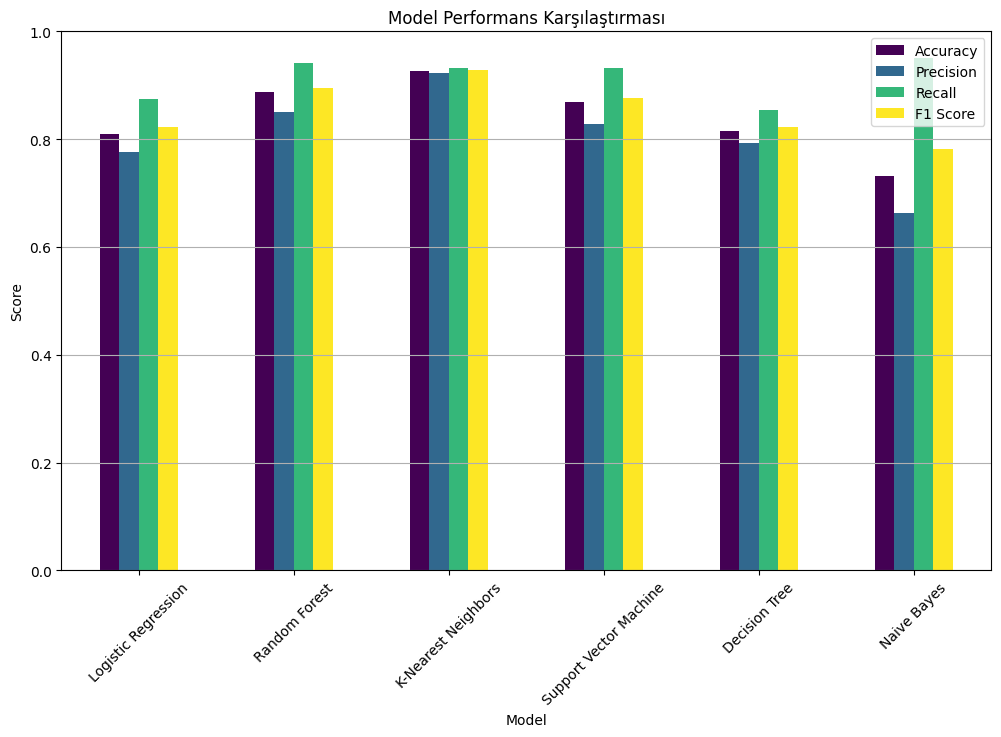

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

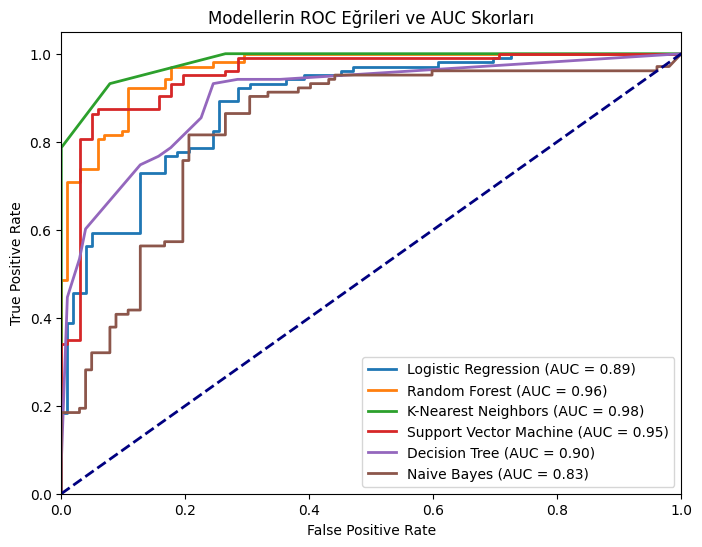

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict_proba ile pozitif sınıf olasılıklarını alıyoruz
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Bazı modeller predict_proba() desteklemez, decision_function kullanabiliriz
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri ve AUC Skorları')
plt.legend(loc='lower right')
plt.show()

#### 2-) Logaritmik Dönüşüm işlemi yapılmış veri setinde makine öğrenmesi algoritmalarının denenmesi planlanmaktadır.

In [19]:
from sklearn.model_selection import train_test_split

X = df4_2.drop("target", axis=1)  # Bağımsız değişkenler
y = df4_2["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.94      0.95      0.95       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.809756   0.775862  0.873786  0.821918
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.946341   0.942308  0.951456  0.946860
3  Support Vector Machine  0.819512   0.784483  0.883495  0.831050
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.721951   0.653333  0.951456  0.774704


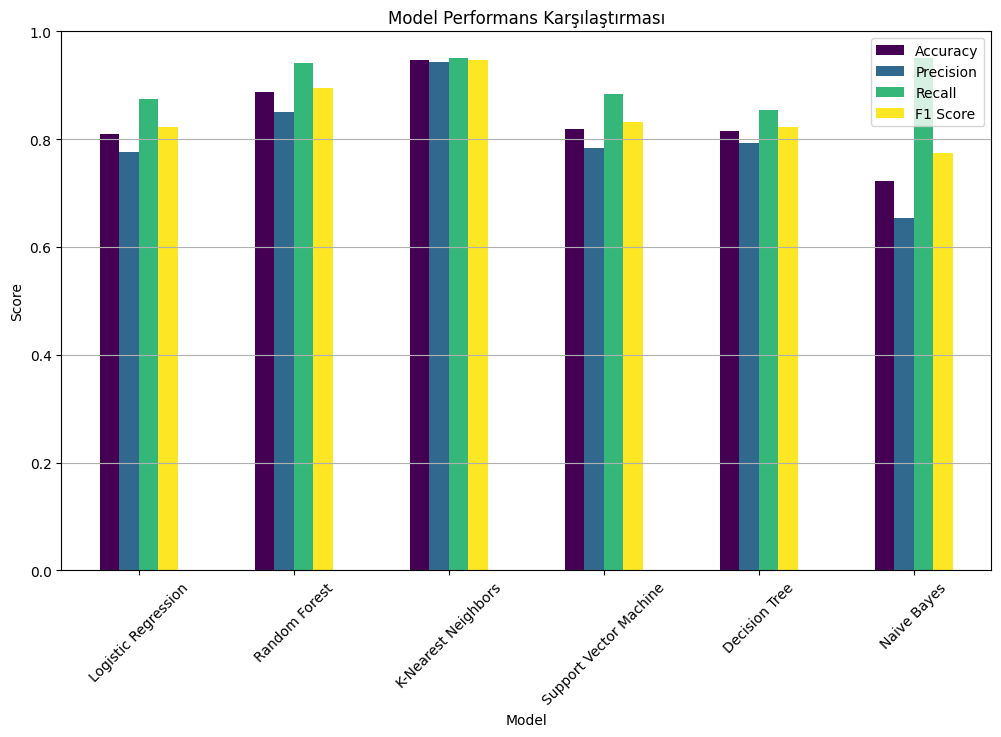

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

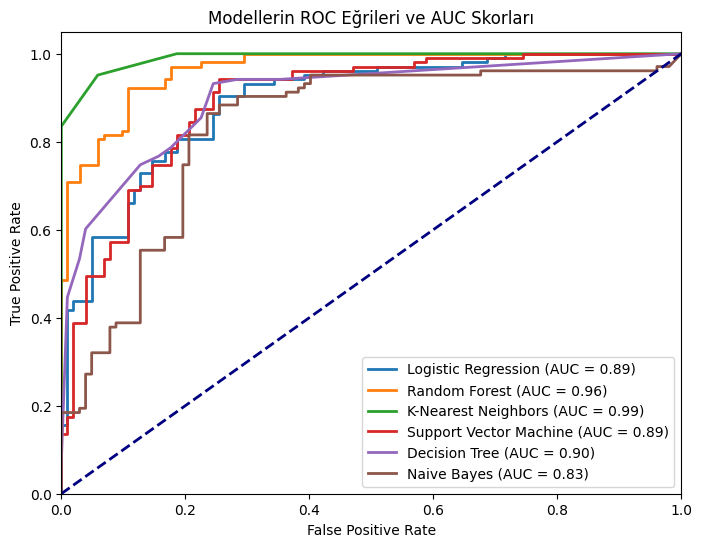

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict_proba ile pozitif sınıf olasılıklarını alıyoruz
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Bazı modeller predict_proba() desteklemez, decision_function kullanabiliriz
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri ve AUC Skorları')
plt.legend(loc='lower right')
plt.show()

#### 3-) Karekök Dönüşüm işlemi yapılmış veri setinde makine öğrenmesi algoritmalarının denenmesi planlanmaktadır.

In [23]:
from sklearn.model_selection import train_test_split

X = df4_3.drop("target", axis=1)  # Bağımsız değişkenler
y = df4_3["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    




--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.77      0.85      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       102
           1       0.92      0.93      0.93       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.800000   0.771930  0.854369  0.811060
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.926829   0.923077  0.932039  0.927536
3  Support Vector Machine  0.819512   0.779661  0.893204  0.832579
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.741463   0.671233  0.951456  0.787149


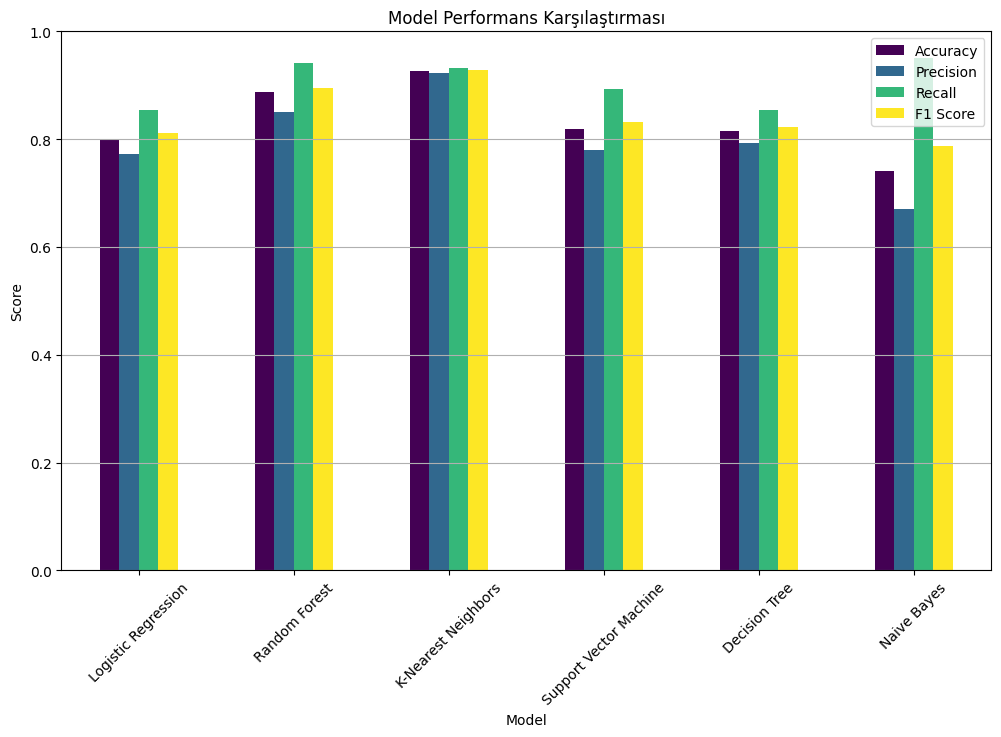

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

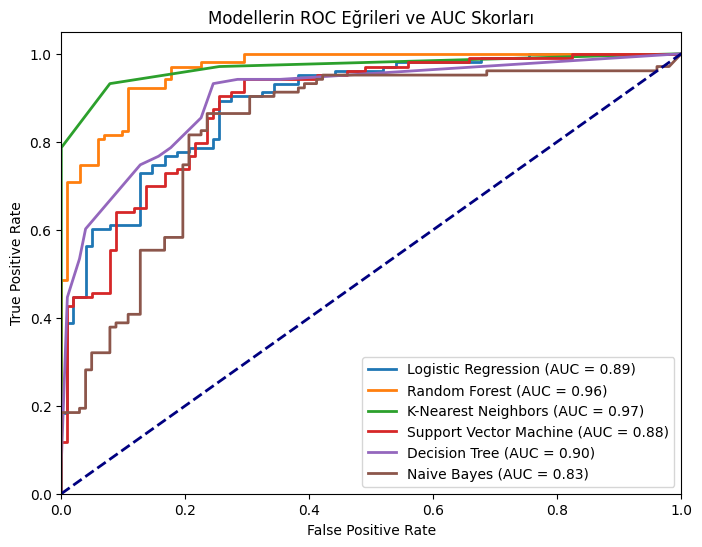

In [25]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict_proba ile pozitif sınıf olasılıklarını alıyoruz
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Bazı modeller predict_proba() desteklemez, decision_function kullanabiliriz
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri ve AUC Skorları')
plt.legend(loc='lower right')
plt.show()



#### 4-) Hibrit model uygulanmış veri setinde makine öğrenmesi algoritmalarının denenmesi planlanmaktadır.

In [26]:
from sklearn.model_selection import train_test_split

X = df4_4.drop("target", axis=1)  # Bağımsız değişkenler
y = df4_4["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.78      0.88      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       102
           1       0.97      0.93      0.95       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.814634   0.777778  0.883495  0.827273
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.951220   0.969697  0.932039  0.950495
3  Support Vector Machine  0.839024   0.801724  0.902913  0.849315
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.726829   0.657718  0.951456  0.777778


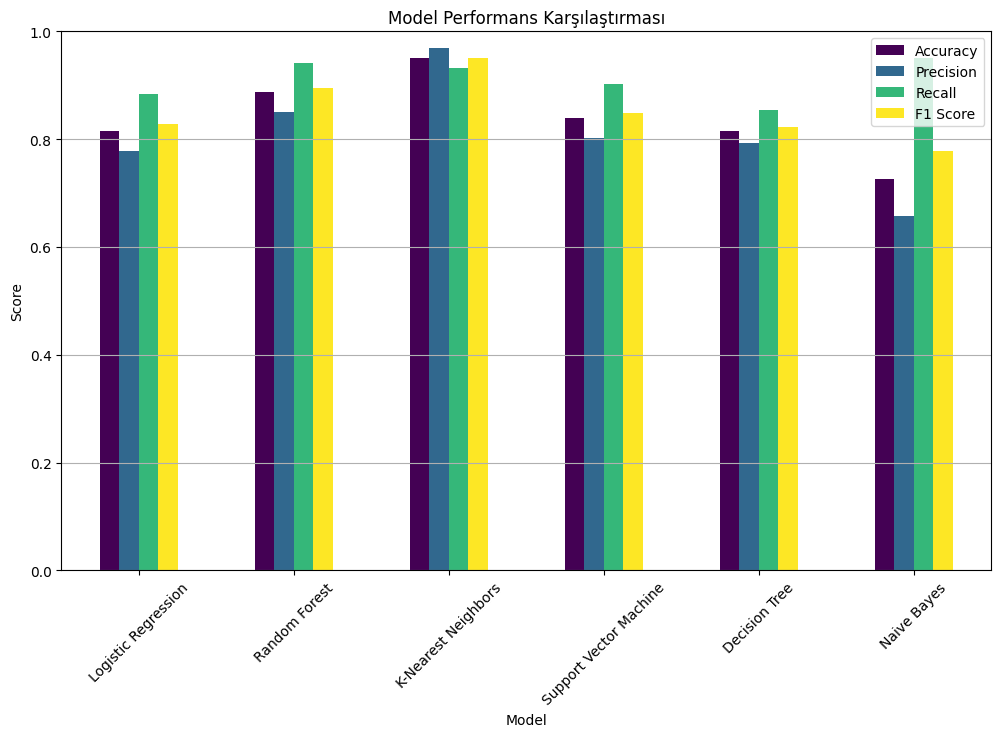

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


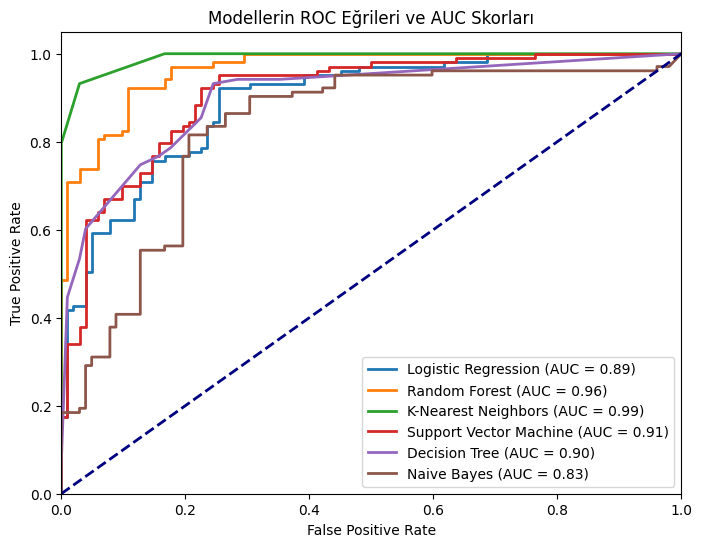

In [28]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # predict_proba ile pozitif sınıf olasılıklarını alıyoruz
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        # Bazı modeller predict_proba() desteklemez, decision_function kullanabiliriz
        y_probs = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri ve AUC Skorları')
plt.legend(loc='lower right')
plt.show()

#### df4_1 veri setinin genel başarısının daha yüksek olduğu gözlemlenmiş ve bu model seçilmiştir.
#### df4_1   
<pre>
Accuracy:      0,839837333                                   
Precision:     0,8053928                                 
Recall:        0,9142395                                   
F1-score:      0,8539135     
</pre>

#### df4_2     
<pre>
Accuracy:      0,83333                   
Precision:     0,799942667               
Recall:        0,909385                 
F1-score:      0,848495167   
</pre>

#### df4_3     
<pre>
Accuracy:   0,831707                      
Precision:  0,798261833               
Recall:     0,904530833           
F1-score:   0,845793833     
</pre>

#### df4_4
<pre>
Accuracy:   0.839024
Precision:  0.808431167
Recall:     0.911003333
F1-score:   0.85355
</pre>


#### Veri Standardizasyon İşlemi:
##### Bu bölümde 3 tane çok sık kullanılan veri standardizasyon yöntemi üzerinde çalışmalar yapılması planlanmaktadır.
##### 1-) StandardScaler
##### 2-) MinMaxScaler
##### 3-) RobustScaler
##### 4-) Hibrit Model

In [16]:
df5_1 = df5.copy()
df5_2 = df5.copy()
df5_3 = df5.copy()
df5_4 = df5.copy()

#### 1-) StandardScaler Uygulama

In [17]:
from sklearn.preprocessing import StandardScaler

# Ölçeklenecek sütunlar
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# StandardScaler nesnesi oluştur
scaler = StandardScaler()

# Seçilen sütunları ölçeklendir
df5_1[columns_to_scale] = scaler.fit_transform(df5_1[columns_to_scale])

##### 2-) MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Ölçeklenecek sütunlar
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# MinMaxScaler nesnesi oluştur (0-1 aralığına çeker)
scaler = MinMaxScaler()

# Seçilen sütunlara MinMaxScaler uygula
df5_2[columns_to_scale] = scaler.fit_transform(df5_2[columns_to_scale])

##### 3-) RobustScaler

In [19]:
from sklearn.preprocessing import RobustScaler

# Ölçeklenecek sütunlar
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# RobustScaler nesnesi oluştur
scaler = RobustScaler()

# Seçilen sütunlara scaler uygula ve güncelle
df5_3[columns_to_scale] = scaler.fit_transform(df5_3[columns_to_scale])

##### 4-) Hibrit Model

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Orijinal df5_4 kopyası
df5_4_scaled = df5_4.copy()

# Scaler nesneleri
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
scaler_robust = RobustScaler()

# 1. 'trestbps' için RobustScaler uygula
df5_4_scaled['trestbps'] = scaler_robust.fit_transform(df5_4_scaled[['trestbps']])

# 2. 'age' ve 'chol' için StandardScaler uygula
df5_4_scaled[['age', 'chol']] = scaler_standard.fit_transform(df5_4_scaled[['age', 'chol']])

# 3. 'thalach' ve 'oldpeak' için MinMaxScaler uygula
df5_4_scaled[['thalach', 'oldpeak']] = scaler_minmax.fit_transform(df5_4_scaled[['thalach', 'oldpeak']])

### Standardizasyon sonrası modeller denenerek potansiyeli en yüksek veri setine karar verilmesi:

#### Uygulanan standardizasyon işlemleri sonucunda üretilen veri setlerinin performanslarını ölçerek potansiyel olarak hangisinin daha iyi olabileceğine karar vermek için modeller deneniyor.

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       102
           1       0.92      0.93      0.93       103

    accuracy                

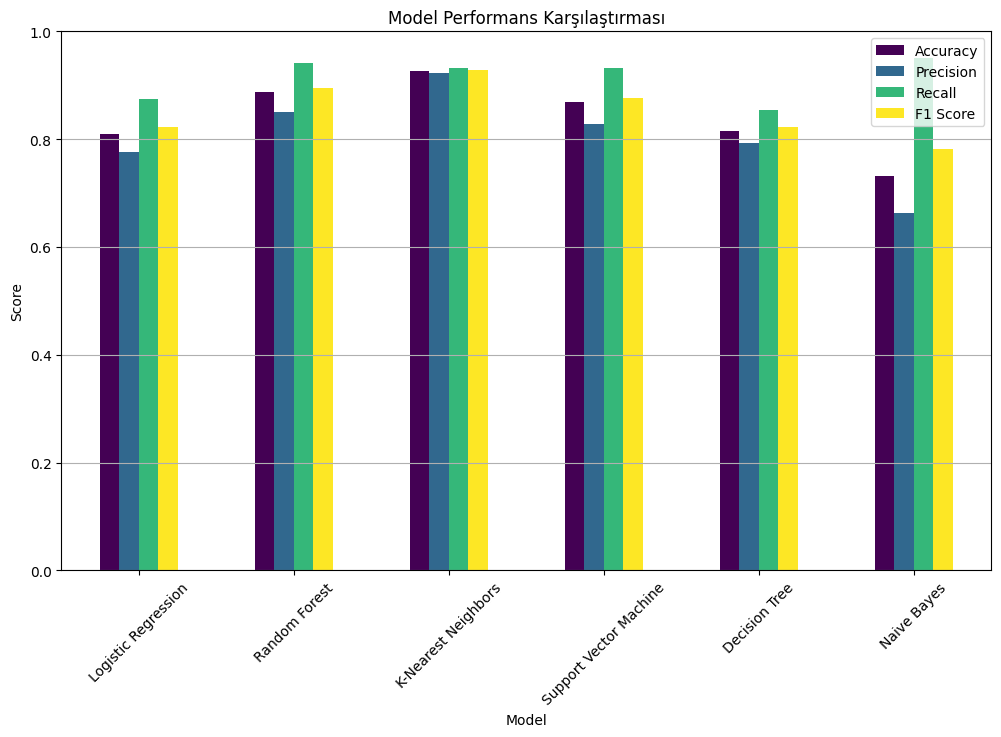

In [29]:
from sklearn.model_selection import train_test_split

X = df5_1.drop("target", axis=1)  # Bağımsız değişkenler
y = df5_1["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    
    
    
    
    
    
    
    
    
    
    
    


In [22]:
from sklearn.model_selection import train_test_split

X = df5_3.drop("target", axis=1)  # Bağımsız değişkenler
y = df5_3["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    
    

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.77      0.86      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       102
           1       0.92      0.95      0.94       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.804878   0.773913  0.864078  0.816514
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.936585   0.924528  0.951456  0.937799
3  Support Vector Machine  0.878049   0.842105  0.932039  0.884793
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.731707   0.662162  0.951456  0.780876


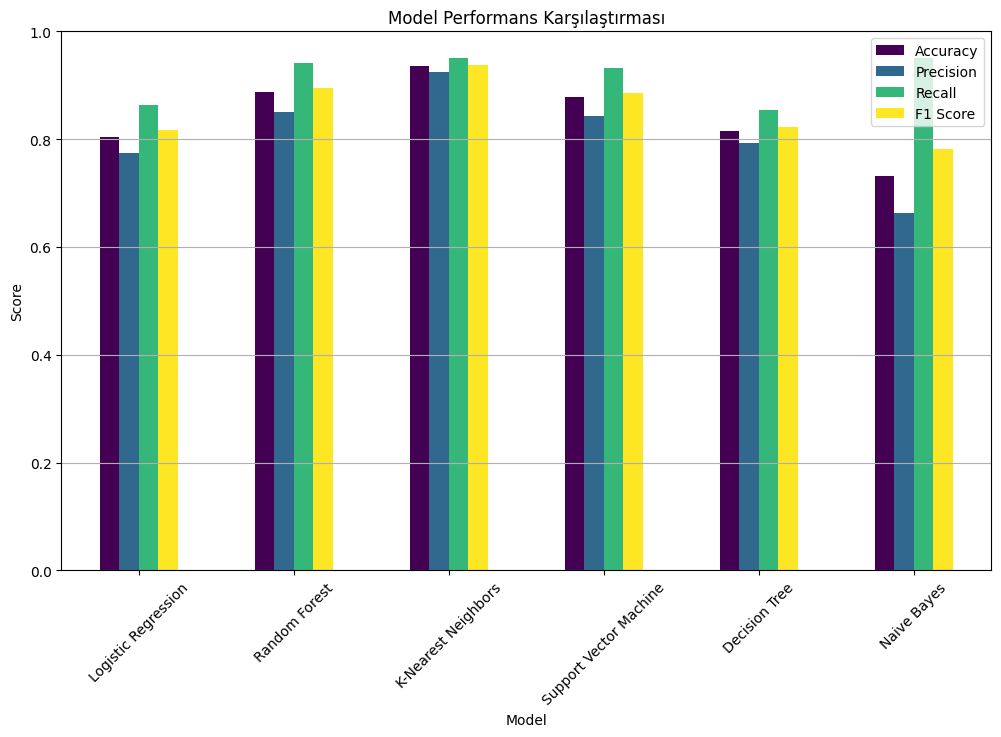

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [10]:
df6 = df5_2.copy()

In [30]:
from sklearn.model_selection import train_test_split

X = df5_2.drop("target", axis=1)  # Bağımsız değişkenler
y = df5_2["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.model_selection import train_test_split

X = df5_2.drop("target", axis=1)  # Bağımsız değişkenler
y = df5_2["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")
    
    
    
    
    
    
    
    
    
    
    
    


--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       102
           1       0.78      0.88      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       102
           1       0.94      0.95      0.95       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.819512   0.784483  0.883495  0.831050
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.946341   0.942308  0.951456  0.946860
3  Support Vector Machine  0.897561   0.866071  0.941748  0.902326
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.731707   0.662162  0.951456  0.780876


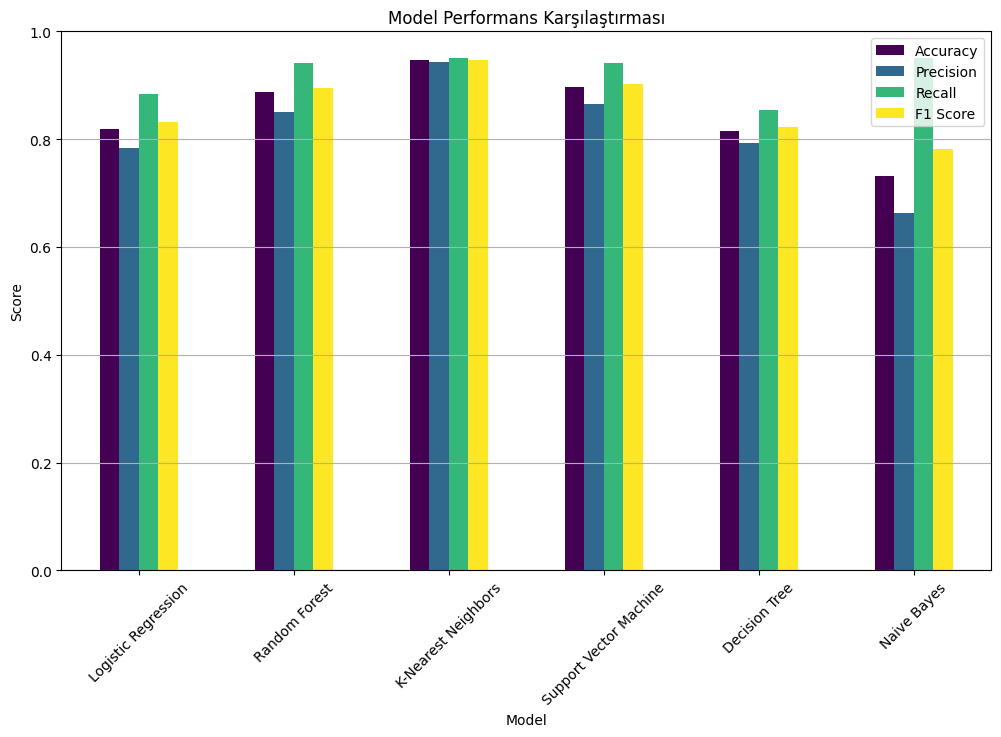

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X = df5_4_scaled.drop("target", axis=1)  # Bağımsız değişkenler
y = df5_4_scaled["target"]               # Bağımlı değişken (etiket)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 3. Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB()
}

# 4. Eğit ve değerlendir
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Precision:", precision_score(y_test, y_pred))
    #print("Recall:", recall_score(y_test, y_pred))
    #print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Logistic Regression ---
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       102
           1       0.77      0.83      0.80       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



--- Random Forest ---
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



--- K-Nearest Neighbors ---
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       102
           1       0.95      0.97      0.96       103

    accuracy                

                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.809756   0.775862  0.873786  0.821918
1           Random Forest  0.887805   0.850877  0.941748  0.894009
2     K-Nearest Neighbors  0.926829   0.923077  0.932039  0.927536
3  Support Vector Machine  0.868293   0.827586  0.932039  0.876712
4           Decision Tree  0.814634   0.792793  0.854369  0.822430
5             Naive Bayes  0.731707   0.662162  0.951456  0.780876


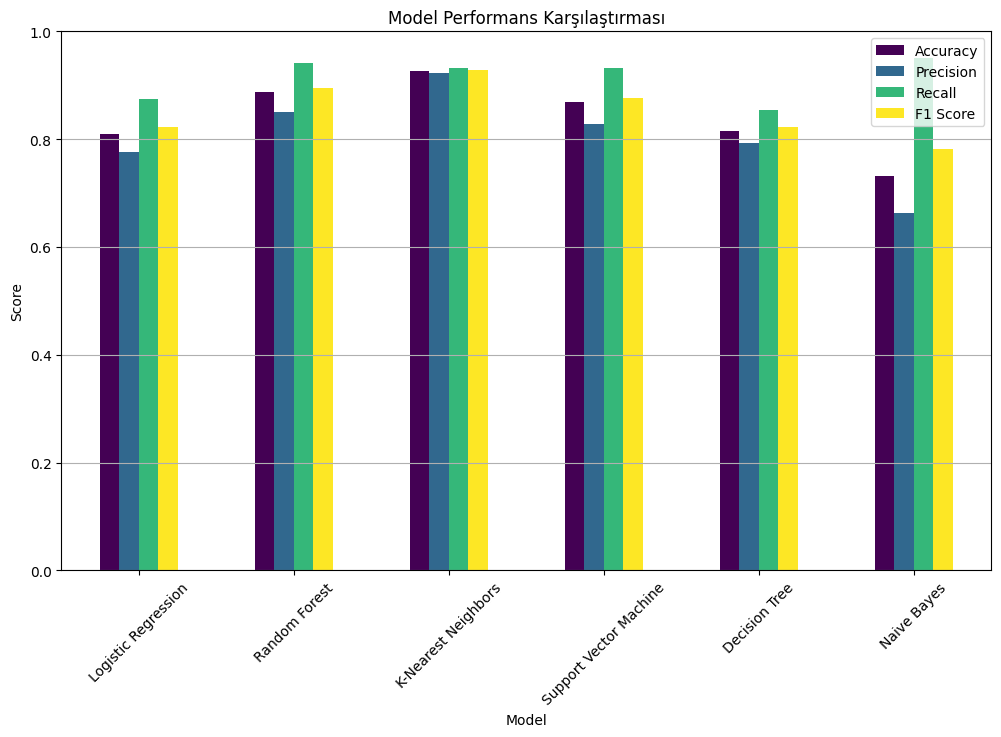

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Performans sonuçlarını depolamak için boş liste
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

# DataFrame oluştur
df_results = pd.DataFrame(results)

# Tabloyu göster
print(df_results)

# Grafik çiz
df_results.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(
    kind='bar', figsize=(12, 7), colormap='viridis'
)
plt.title("Model Performans Karşılaştırması")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### Standardizasyon sonrası hangi veri seti potansiyel olarak daha iyi ?

<pre>
</pre>

Veri Ön işleme adımları tamamlandı. 

In [11]:
df7 = df6.copy()

##### Modellemeler deneyeceğimiz veri setinin bir kopyasını oluşturduk.

### MAKİNE ÖĞRENMESİ ALGORİTMALARININ DENENMESİ

In [23]:
from sklearn.model_selection import train_test_split
# Özellikler ve hedef değişken
X = df6.drop("target", axis=1)
y = df6["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### 1-) KNN 

En iyi parametreler: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
En iyi F1 skoru (CV): 0.9881930257132794

Test Seti Performans Metrikleri:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



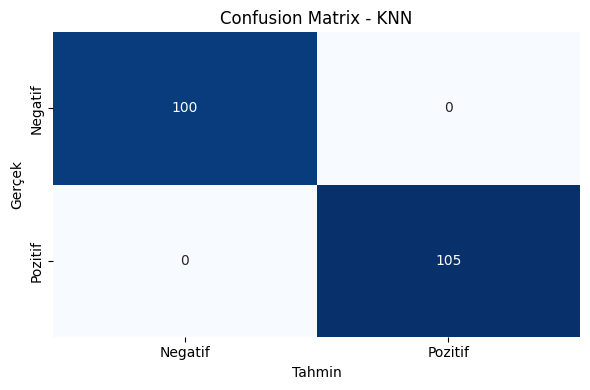

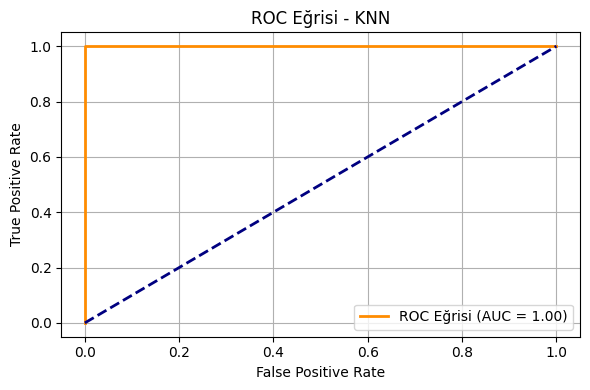

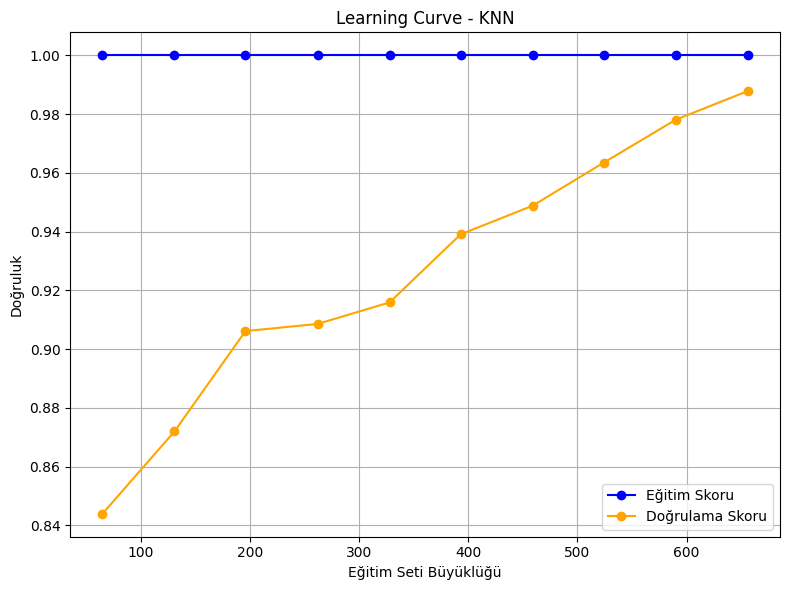

10-Fold Cross Validation Ortalama F1 Skoru: 0.9904


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

def train_and_evaluate_knn(X_train, y_train, X_test, y_test):
    # 1. Parametre aralığı
    knn = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': range(1, 21),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'chebyshev']
    }

    # 2. GridSearchCV ile en iyi parametreleri bul
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)

    print("En iyi parametreler:", grid_search.best_params_)
    print("En iyi F1 skoru (CV):", grid_search.best_score_)
    
     # 3. En iyi model
    best_knn = grid_search.best_estimator_

    # 4. Test seti tahminleri
    y_pred = best_knn.predict(X_test)
    y_proba = best_knn.predict_proba(X_test)[:, 1]

    # 5. Performans metrikleri
    print("\nTest Seti Performans Metrikleri:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    # 6. Confusion Matrix görselleştirme
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negatif', 'Pozitif'],
                yticklabels=['Negatif', 'Pozitif'])
    plt.xlabel('Tahmin')
    plt.ylabel('Gerçek')
    plt.title('Confusion Matrix - KNN')
    plt.tight_layout()
    plt.show()
    
     # 7. ROC Eğrisi
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Eğrisi - KNN')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    
    
    # 8. Learning Curve (Öğrenme Eğrisi) ile Overfitting Kontrolü
    train_sizes, train_scores, val_scores = learning_curve(
        best_knn, X_train, y_train, cv=5, scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Eğitim Skoru')
    plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Doğrulama Skoru')
    plt.title('Learning Curve - KNN')
    plt.xlabel('Eğitim Seti Büyüklüğü')
    plt.ylabel('Doğruluk')
    plt.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    
      # 9. 10-Fold Cross Validation ile F1 skoru
    f1_scores_cv = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='f1')
    print(f"10-Fold Cross Validation Ortalama F1 Skoru: {f1_scores_cv.mean():.4f}")

    # Sonuç olarak best_knn ve grid_search nesnelerini dönebiliriz
    return best_knn, grid_search


best_knn_model, knn_grid_search = train_and_evaluate_knn(X_train, y_train, X_test, y_test) 

#### 2-) Random Forest 

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Model ve Grid Search
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi F1 skoru:", grid_search.best_score_)




En iyi parametreler: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
En iyi F1 skoru: 0.9869379489288992



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



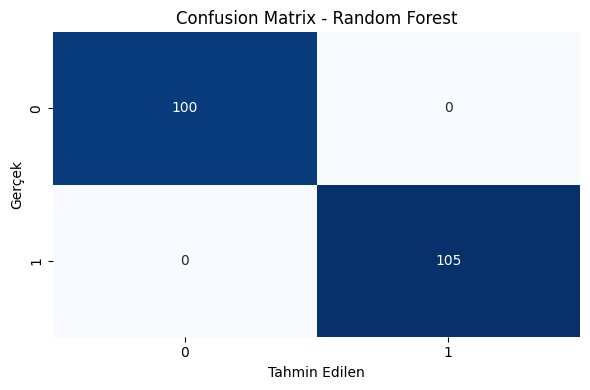

In [32]:
# 2. En iyi modeli al
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# 3. Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()

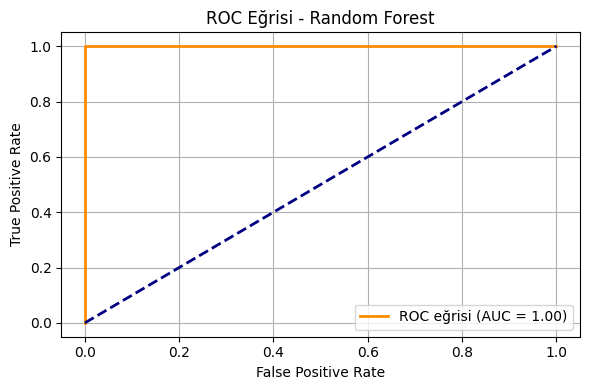

In [33]:
# 5. ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC eğrisi (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
# 6. Train-Test Skor Karşılaştırması
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

# 7. K-Fold Cross-Validation (F1 Score)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=10, scoring='f1')
print("10-Fold Cross-Validation F1 Skorları:", np.round(cv_scores, 4))
print("Ortalama F1 Skoru:", np.mean(cv_scores).round(4))

Train Accuracy: 1.0000
Test Accuracy:  1.0000
10-Fold Cross-Validation F1 Skorları: [1.     0.9639 0.9882 0.9882 0.9882 1.     1.     0.988  1.     1.    ]
Ortalama F1 Skoru: 0.9917


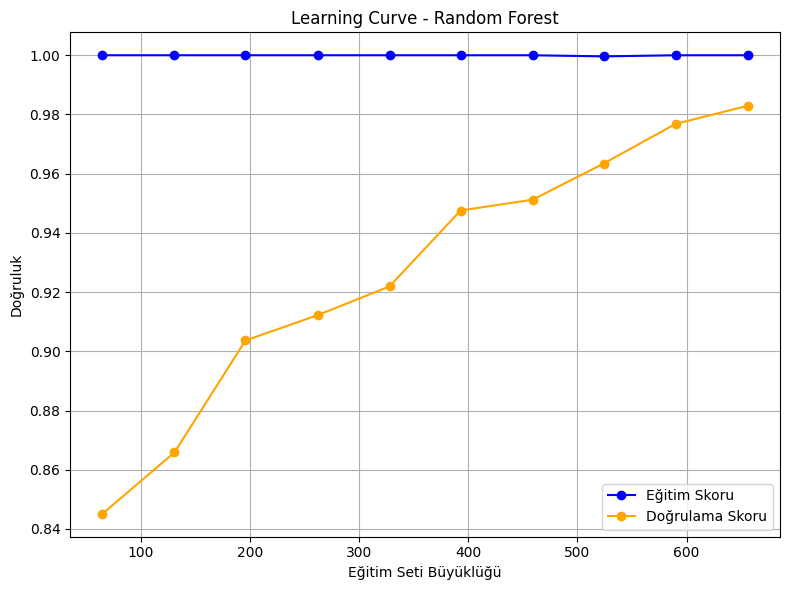

In [29]:
# 8. Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=42
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Eğitim Skoru')
plt.plot(train_sizes, val_mean, 'o-', color='orange', label='Doğrulama Skoru')
plt.title('Learning Curve - Random Forest')
plt.xlabel('Eğitim Seti Büyüklüğü')
plt.ylabel('Doğruluk')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

#### 3-) Lojistik Regresyon

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Lojistik regresyon modeli
log_reg = LogisticRegression(solver='liblinear')

# Hiperparametreler
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]  # C değeri azaldıkça regularization artar
}

# GridSearchCV ile en iyi parametreleri bul
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# En iyi model
best_log_reg = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)

En iyi parametreler: {'C': 100, 'penalty': 'l2'}


Test Seti Doğruluk: 0.8585365853658536
Test Seti Precision: 0.8333333333333334
Test Seti Recall: 0.9047619047619048
Test Seti F1 Score: 0.867579908675799


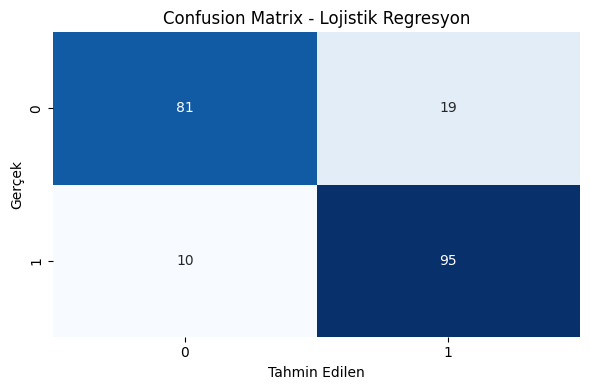

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       100
           1       0.83      0.90      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [31]:
# Test verisi ile tahmin
y_pred = best_log_reg.predict(X_test)

# Metri̇kleri̇ hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Performans ölçümleri
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred))
print("Test Seti Precision:", precision_score(y_test, y_pred))
print("Test Seti Recall:", recall_score(y_test, y_pred))
print("Test Seti F1 Score:", f1_score(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Lojistik Regresyon")
plt.tight_layout()
plt.show()
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

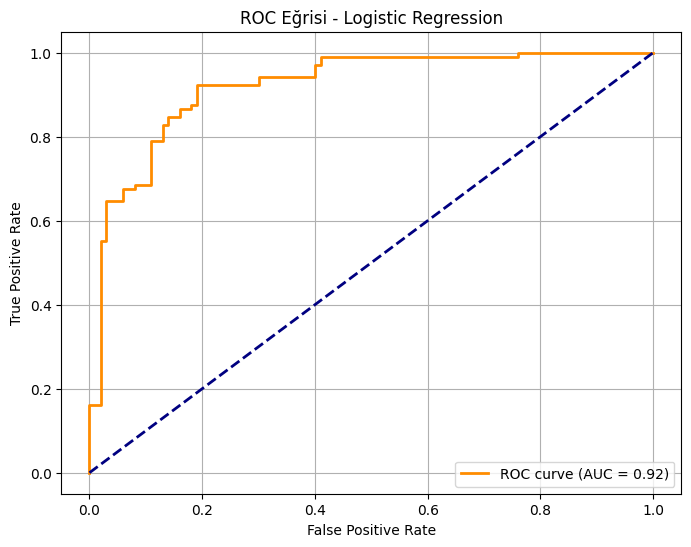

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Olasılık tahminleri (ROC eğrisi için)
y_prob = best_log_reg.predict_proba(X_test)[:, 1]

# ROC eğrisi verileri
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

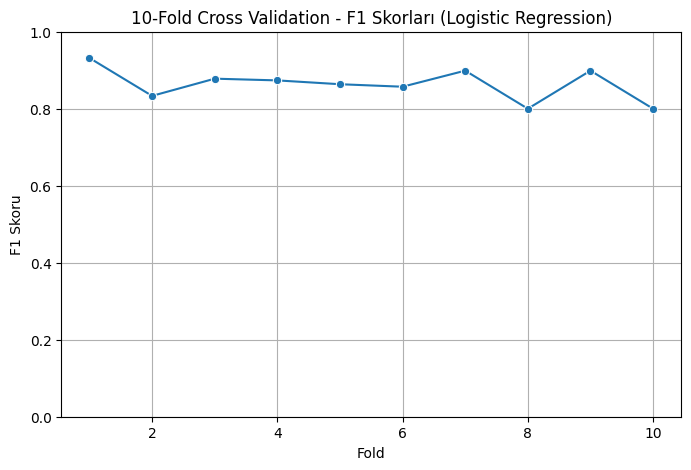

Ortalama F1 Skoru: 0.8635


In [33]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

# 10-fold cross validation f1 skorları
f1_scores = cross_val_score(best_log_reg, X_train, y_train, cv=10, scoring='f1')

# Grafik çiz
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=f1_scores, marker='o')
plt.title('10-Fold Cross Validation - F1 Skorları (Logistic Regression)')
plt.xlabel('Fold')
plt.ylabel('F1 Skoru')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Ortalama F1 skoru
print(f"Ortalama F1 Skoru: {f1_scores.mean():.4f}")

#### 4-) Support Vector Machine (SVM)

In [41]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# SVM model (olasılık tahmini için probability=True)
svm = SVC(probability=True)

# Hiperparametre arama alanı
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid Search ile en iyi parametreleri bul
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='f1')
grid_search_svm.fit(X_train, y_train)

# En iyi model
best_svm = grid_search_svm.best_estimator_
print("En iyi parametreler:", grid_search_svm.best_params_)


En iyi parametreler: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


Test Seti Doğruluk: 0.9804878048780488
Test Seti Precision: 0.963302752293578
Test Seti Recall: 1.0
Test Seti F1 Score: 0.9813084112149533


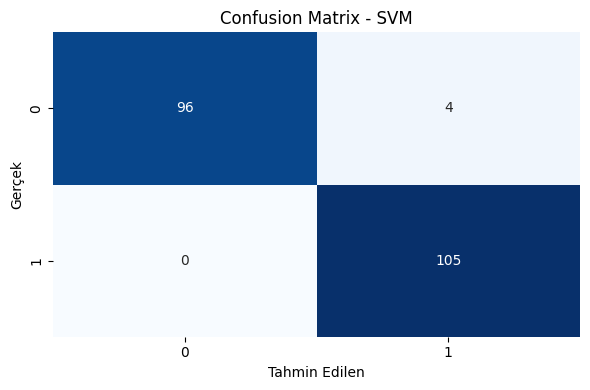

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       100
           1       0.96      1.00      0.98       105

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [42]:
# Test verisi ile tahmin
y_pred = best_svm.predict(X_test)

# Değerlendirme metrikleri
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Performans ölçümleri
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred))
print("Test Seti Precision:", precision_score(y_test, y_pred))
print("Test Seti Recall:", recall_score(y_test, y_pred))
print("Test Seti F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix hesapla
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))

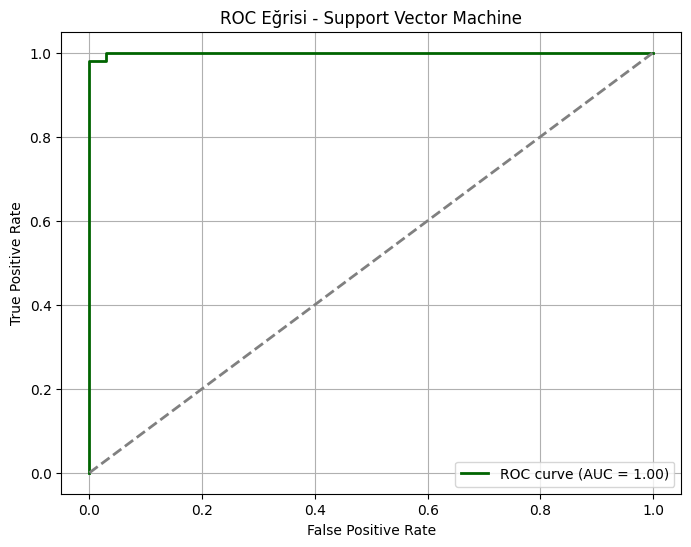

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = best_svm.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Support Vector Machine')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

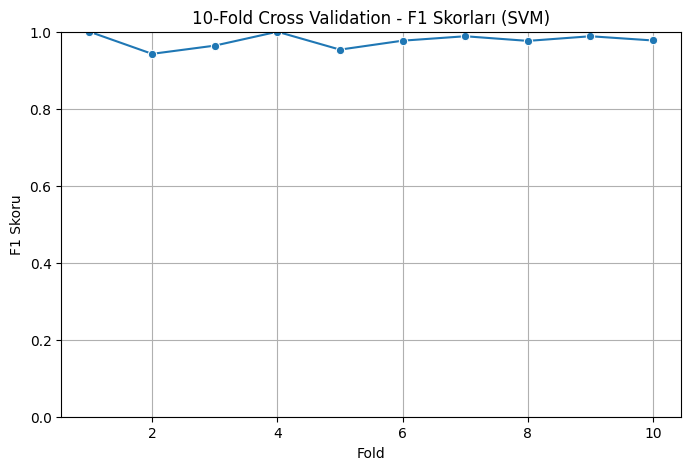

Ortalama F1 Skoru: 0.9767


In [37]:
from sklearn.model_selection import cross_val_score
import seaborn as sns

f1_scores = cross_val_score(best_svm, X_train, y_train, cv=10, scoring='f1')

plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=f1_scores, marker='o')
plt.title('10-Fold Cross Validation - F1 Skorları (SVM)')
plt.xlabel('Fold')
plt.ylabel('F1 Skoru')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

print(f"Ortalama F1 Skoru: {f1_scores.mean():.4f}")

#### 5-) Karar Ağaçları

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model
dt = DecisionTreeClassifier(random_state=42)

# Hiperparametre arama alanı
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search ile en iyi parametreleri bul
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1')
grid_search_dt.fit(X_train, y_train)

# En iyi model
best_dt = grid_search_dt.best_estimator_
print("En iyi parametreler:", grid_search_dt.best_params_)

En iyi parametreler: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Test Seti Doğruluk: 0.9853658536585366
Test Seti Precision: 1.0
Test Seti Recall: 0.9714285714285714
Test Seti F1 Score: 0.9855072463768116


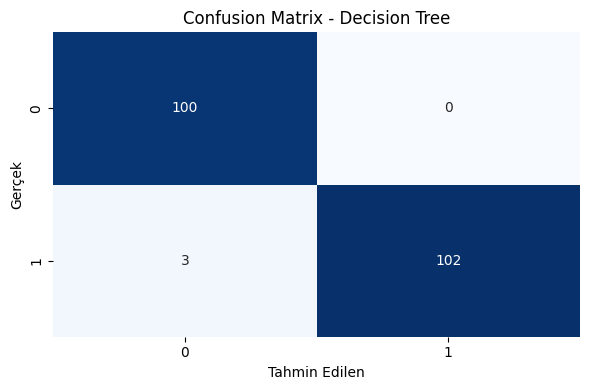

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [39]:
# Test verisi ile tahmin
y_pred = best_dt.predict(X_test)

# Değerlendirme metrikleri
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred))
print("Test Seti Precision:", precision_score(y_test, y_pred))
print("Test Seti Recall:", recall_score(y_test, y_pred))
print("Test Seti F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()

#classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

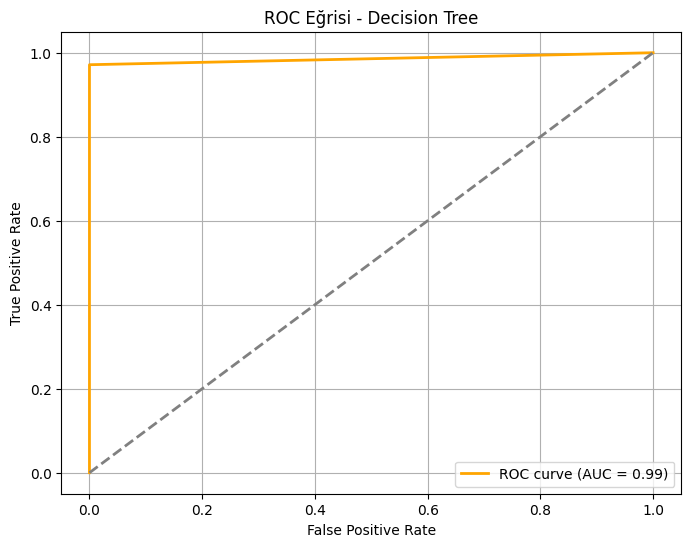

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = best_dt.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

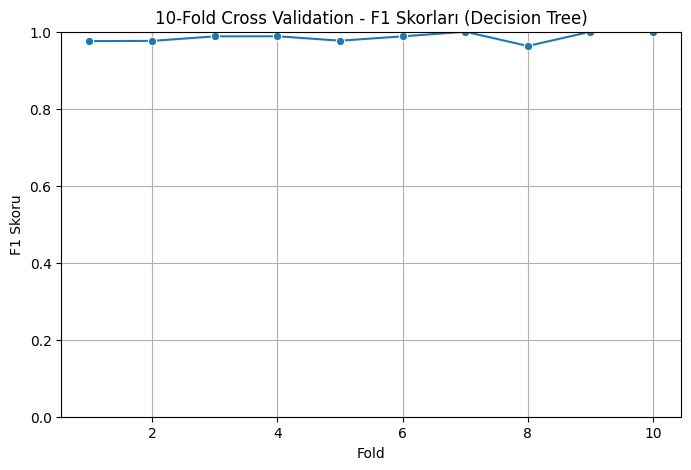

Ortalama F1 Skoru: 0.9856


In [41]:
import seaborn as sns

f1_scores = cross_val_score(best_dt, X_train, y_train, cv=10, scoring='f1')

plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=f1_scores, marker='o')
plt.title('10-Fold Cross Validation - F1 Skorları (Decision Tree)')
plt.xlabel('Fold')
plt.ylabel('F1 Skoru')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

print(f"Ortalama F1 Skoru: {f1_scores.mean():.4f}")

#### 6-) Naive Bayes

Test Seti Doğruluk: 0.8097560975609757
Test Seti Precision: 0.7946428571428571
Test Seti Recall: 0.8476190476190476
Test Seti F1 Score: 0.8202764976958525


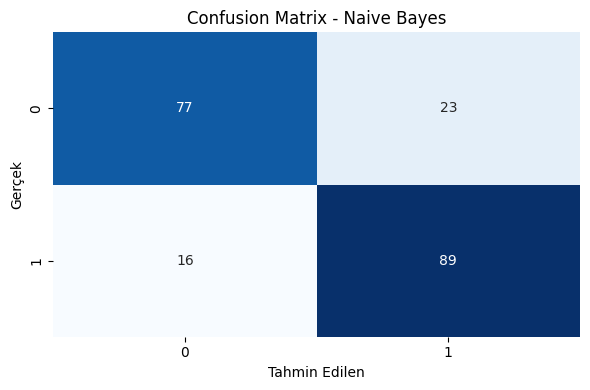

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.85      0.82       105

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205

10-Fold Cross Validation Ortalama F1 Skoru: 0.8459


In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Model oluştur
nb = GaussianNB()

# Modeli eğit
nb.fit(X_train, y_train)

# Test seti tahmini
y_pred = nb.predict(X_test)

# Performans ölçümleri
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred))
print("Test Seti Precision:", precision_score(y_test, y_pred))
print("Test Seti Recall:", recall_score(y_test, y_pred))
print("Test Seti F1 Score:", f1_score(y_test, y_pred))

# Confusion Matrix hesapla
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

# 10-fold cross validation F1 skoru
f1_scores = cross_val_score(nb, X_train, y_train, cv=10, scoring='f1')
print(f"10-Fold Cross Validation Ortalama F1 Skoru: {f1_scores.mean():.4f}")

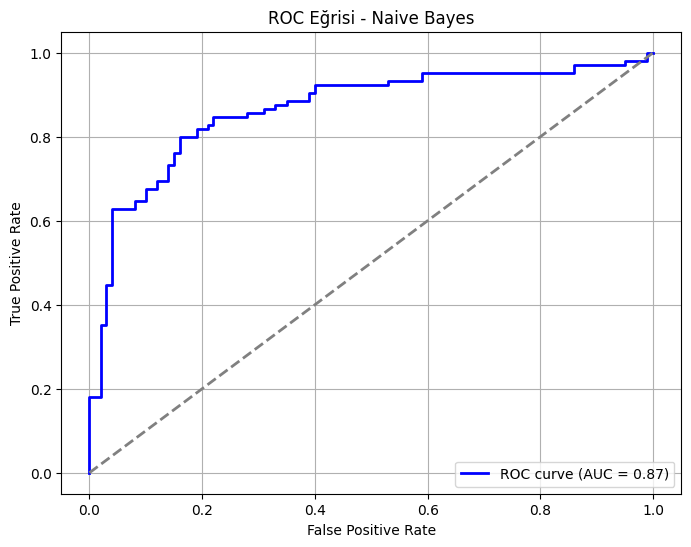

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = nb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 7-) XGBoost 


##### use_label_encoder=False ve eval_metric='logloss' ayarları XGBoost'un uyarılar vermemesi için gerekli.

##### n_jobs=-1 ile tüm CPU çekirdekleri kullanılır → daha hızlı sonuç.

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Model Tanımı
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# 2. Hiperparametreler
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

# 3. GridSearchCV ile en iyi parametreleri bul
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. En iyi model
best_xgb = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
En iyi parametreler: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:48:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[100   0]
 [  0 105]]


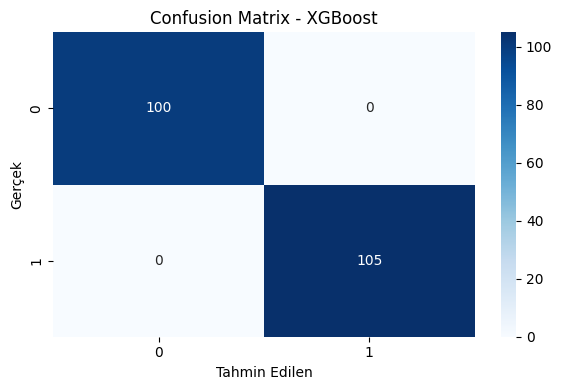

In [48]:
# 5. Tahmin
y_pred = best_xgb.predict(X_test)

# 6. Metrikler
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.tight_layout()
plt.show()

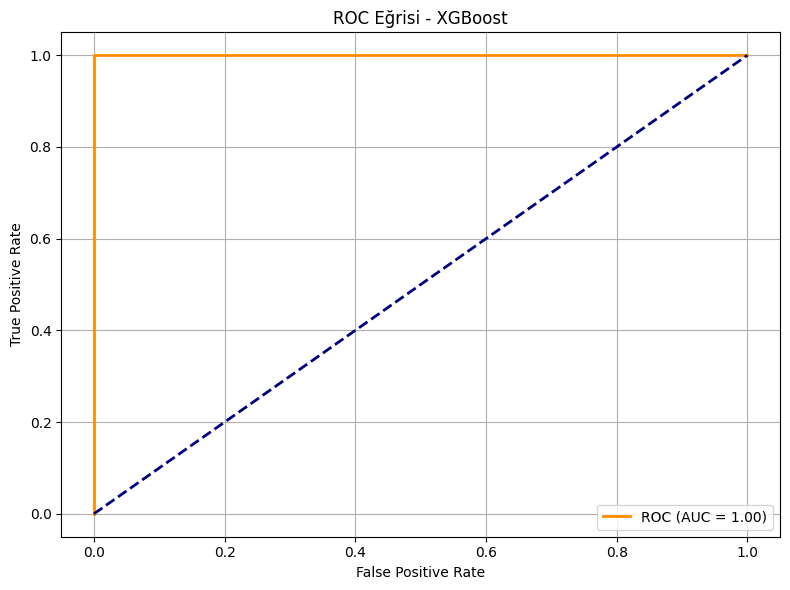

In [49]:
# 8. ROC Eğrisi
y_prob = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

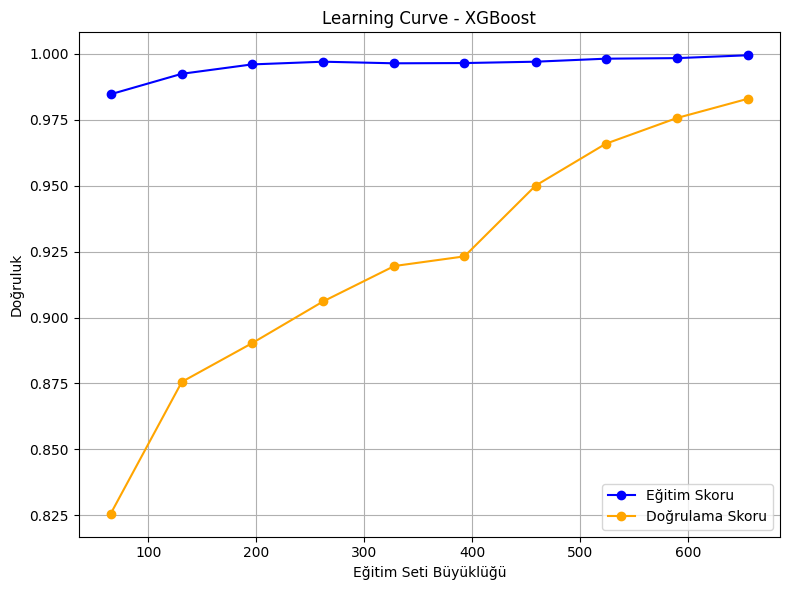

In [47]:
# 9. Learning Curve (Overfitting Kontrolü)
train_sizes, train_scores, val_scores = learning_curve(
    best_xgb, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1, shuffle=True, random_state=42
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', label='Eğitim Skoru', color='blue')
plt.plot(train_sizes, val_mean, 'o-', label='Doğrulama Skoru', color='orange')
plt.title('Learning Curve - XGBoost')
plt.xlabel('Eğitim Seti Büyüklüğü')
plt.ylabel('Doğruluk')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

In [48]:
# 10. Train vs Test Skor Karşılaştırması
train_acc = accuracy_score(y_train, best_xgb.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Eğitim Doğruluğu: {train_acc:.4f}")
print(f"Test Doğruluğu: {test_acc:.4f}")

# 11. K-Fold Cross-Validation (Doğrulama için)
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='f1')
print(f"5-Katlı CV Ortalama F1 Skoru: {cv_scores.mean():.4f}")
print(f"F1 Skor Standart Sapması: {cv_scores.std():.4f}")

Eğitim Doğruluğu: 1.0000
Test Doğruluğu: 1.0000


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


5-Katlı CV Ortalama F1 Skoru: 0.9846
F1 Skor Standart Sapması: 0.0122


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:17:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### 8-) CatBoost

In [49]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(verbose=0, random_seed=42)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200]
}

grid_search = GridSearchCV(catboost, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("CatBoost en iyi parametreler:", grid_search.best_params_)
best_catboost = grid_search.best_estimator_

y_pred = best_catboost.predict(X_test)

CatBoost en iyi parametreler: {'depth': 8, 'iterations': 100, 'learning_rate': 0.2}


In [50]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Modeli tanımla ve en iyi parametreleri uygula
catboost_model = CatBoostClassifier(
    depth=8,
    iterations=100,
    learning_rate=0.2,
    random_seed=42,
    verbose=0  # Eğitim sürecinde çıktı vermesin
)

# Modeli eğit
catboost_model.fit(X_train, y_train)

# Tahmin yap
y_pred = catboost_model.predict(X_test)

# Performans metriklerini yazdır
print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Doğruluk (Accuracy): 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
 [[100   0]
 [  0 105]]


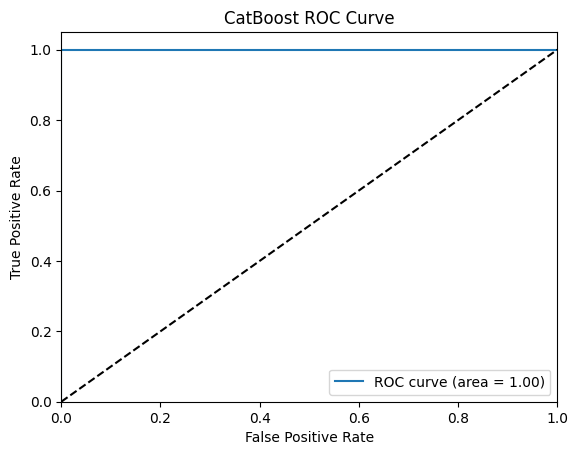

AUC Score: 1.0


In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = catboost_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf olasılığı

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


#### 9-) AdaBoost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier(random_state=42, algorithm='SAMME')  # burada algorithm parametresi eklendi

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("AdaBoost en iyi parametreler:", grid_search.best_params_)
best_ada = grid_search.best_estimator_

y_pred = best_ada.predict(X_test)


AdaBoost en iyi parametreler: {'learning_rate': 1, 'n_estimators': 200}


In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# En iyi parametreler
best_params = {'learning_rate': 1, 'n_estimators': 200}

# Modeli oluştur
ada = AdaBoostClassifier(
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    random_state=42,
    algorithm='SAMME'  # Uyarıyı önlemek için
)

# Modeli eğit
ada.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = ada.predict(X_test)

# Performans raporu
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       100
           1       0.91      0.91      0.91       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

Confusion Matrix:
[[90 10]
 [ 9 96]]


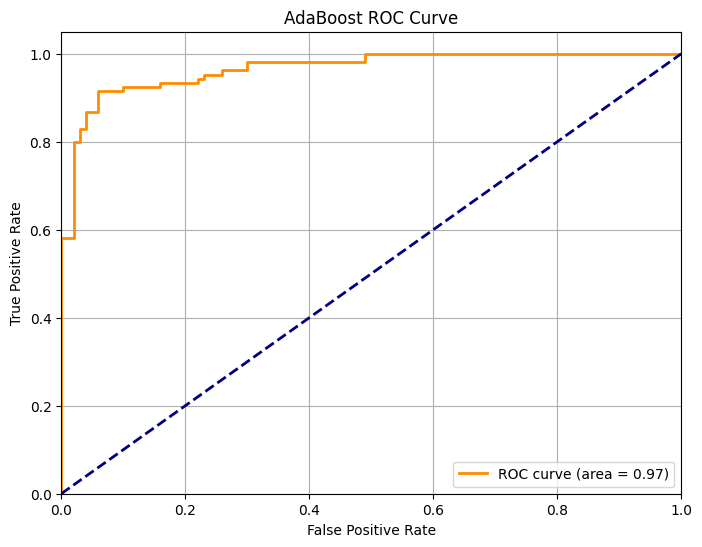

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Tahmin olasılıklarını al (pozitif sınıfın olasılığı)
y_prob = ada.predict_proba(X_test)[:, 1]

# ROC eğrisi için False Positive Rate (FPR) ve True Positive Rate (TPR) hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC (Area Under Curve) hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#### 10-) VotingClassifier
##### En kötü performans gösteren 3 modeli birleştirilmesi

In [55]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('logreg', best_log_reg),
        ('nb', nb),
        ('ada', best_ada)
    ],
    voting='soft'  # olasılıkların ortalamasını alır, daha hassas sonuç verir
)

# Modeli eğit
voting_clf.fit(X_train, y_train)

# Tahmin yap
y_pred = voting_clf.predict(X_test)

# Performans ölçümleri
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:,1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8048780487804879
ROC AUC: 0.919047619047619

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.78      0.86      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



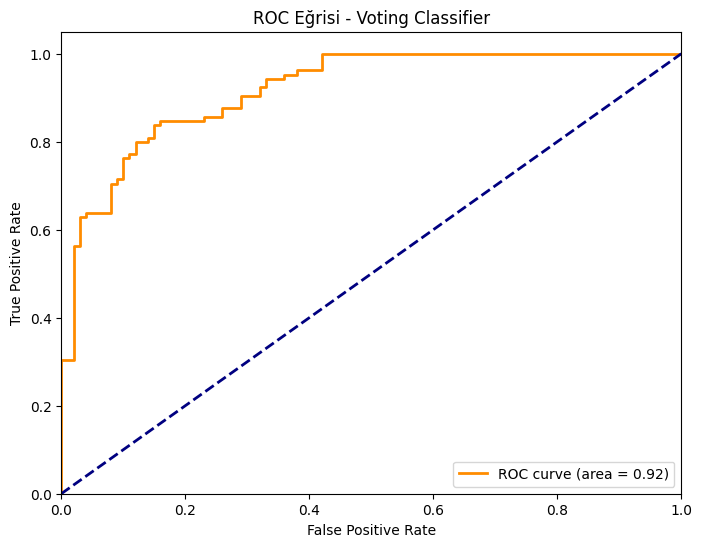

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# VotingClassifier modelin
voting_clf.fit(X_train, y_train)

# Test verisi için tahmin olasılıkları (pozitif sınıf için)
y_probs = voting_clf.predict_proba(X_test)[:, 1]

# ROC eğrisi için gerekli değerler
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi - Voting Classifier')
plt.legend(loc="lower right")
plt.show()

##### En iyi performans gösteren 3 modelin birleştirilmesi

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Voting Classifier oluştur
voting_clf_best = VotingClassifier(
    estimators=[
        ('knn', best_knn_model),
        ('rf', best_rf),
        ('xgb', best_xgb)
    ],
    voting='soft'  # olasılık ortalaması
)

# Modeli eğit
voting_clf_best.fit(X_train, y_train)

# Tahmin yap
y_pred = voting_clf_best.predict(X_test)
y_proba = voting_clf_best.predict_proba(X_test)[:, 1]

# Performans sonuçları
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\Users\PC\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:21:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 1.0000
ROC AUC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



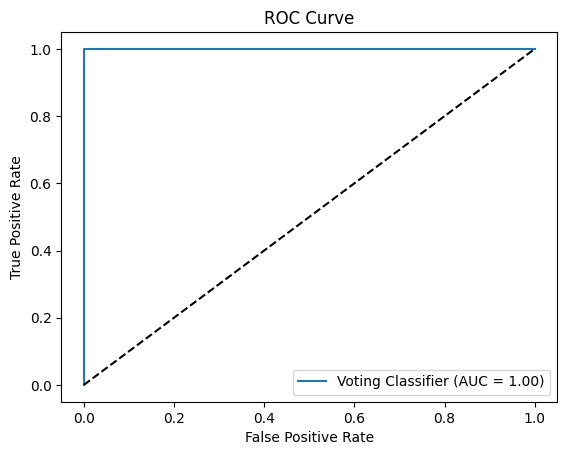

In [59]:

# ROC eğrisi çizimi
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'Voting Classifier (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Özellikler ve hedef değişken
X = df7.drop("target", axis=1)
y = df7["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 10 MAKİNE ÖĞRENMESİ İÇİNDE EN KÖTÜ PERFORMANS GÖSTEREN 3 MODEL İÇİN İYİLEŞTİRME ÇALIŞMALARI YAPILIYOR

### 1-) İLK YÖNTEM SMOTE UYGULANARAK "TARGET" SÜTUNUNDAKİ SINIF SAYISI EŞİTLENİYOR.
#### Veri setimizde "TARGET" sütununda sınıf sayısı aslında dengeli, burada aynı zamanda sınıf sayısı çok dengesiz olmayan veri seti için SMOTE uygulamanın modellere etkisi de araştırılmaktadır.


### 2-) İKİNCİ YÖNTEM "ÖZELLİK MÜHENDİSLİĞİ" YAPILMASIDIR.
##### Özellik mühendisliği yapılarak modellerin performansının nasıl etkileneceği üzerine çalışma yapılıyor.

#### 1-) SMOTE uygulanarak model performansı karşılaştırılacaktır.
#### Bu bölümde target sınıfı denegeliyken SMOTE uygularsak modelin performansının nasıl etkileneceği gözlemlenmektedir.

In [60]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# 3. SMOTE sadece eğitim verisine uygulanır
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("SMOTE öncesi:", Counter(y_train))
print("SMOTE sonrası:", Counter(y_train_res))

SMOTE öncesi: Counter({1: 421, 0: 399})
SMOTE sonrası: Counter({0: 421, 1: 421})


#### 1-) LOJİSTİK REGRESYON 

En iyi parametreler: {'C': 10, 'penalty': 'l1'}
Test Seti Doğruluk: 0.8585365853658536
Test Seti Precision: 0.8333333333333334
Test Seti Recall: 0.9047619047619048
Test Seti F1 Score: 0.867579908675799


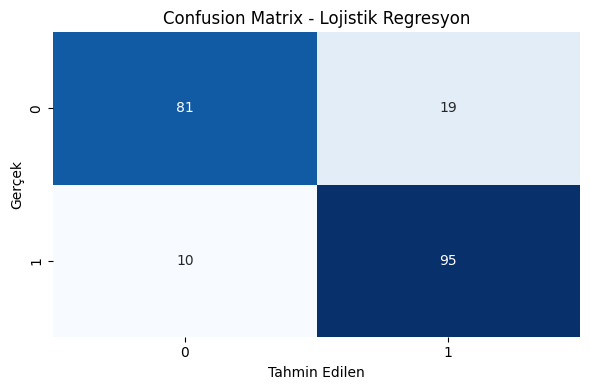

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       100
           1       0.83      0.90      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Lojistik regresyon modeli
log_reg_smote = LogisticRegression(solver='liblinear')

# Hiperparametreler
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV ile en iyi parametreleri bul
grid_search = GridSearchCV(log_reg_smote, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_res, y_train_res)

# En iyi model
best_log_reg_smote = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)

# Test verisi ile tahmin
y_pred_smote = best_log_reg_smote.predict(X_test)

# Performans ölçümleri
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred_smote))
print("Test Seti Precision:", precision_score(y_test, y_pred_smote))
print("Test Seti Recall:", recall_score(y_test, y_pred_smote))
print("Test Seti F1 Score:", f1_score(y_test, y_pred_smote))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Lojistik Regresyon")
plt.tight_layout()
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

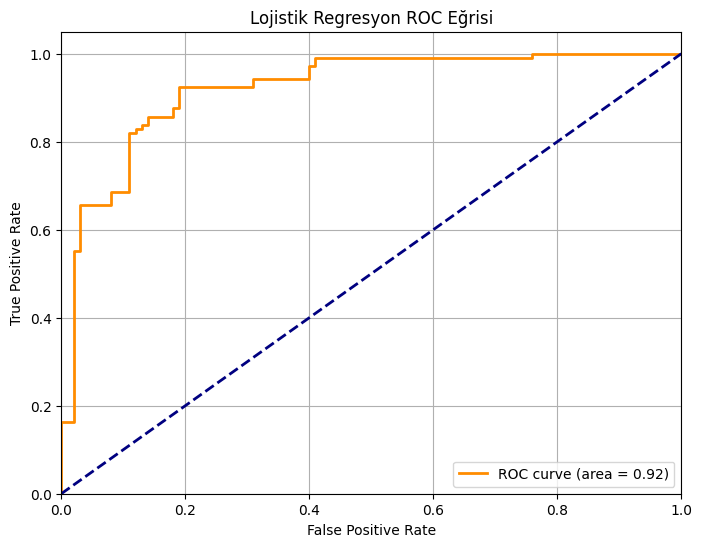

In [62]:
# ROC Eğrisi için olasılık tahminleri (pozitif sınıf)
y_prob = best_log_reg_smote.predict_proba(X_test)[:, 1]

# ROC için FPR, TPR hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# AUC hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lojistik Regresyon ROC Eğrisi')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### 2-) NAİVE BAYES 

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Model oluştur
nb_smote = GaussianNB()

# SMOTE sonrası verilerle modeli eğit
nb_smote.fit(X_train_res, y_train_res)

# Test seti tahmini (Test verisi değişmedi, orijinal X_test kullanılır)
y_pred_smote = nb_smote.predict(X_test)

# Performans ölçümleri
print("Test Seti Doğruluk (SMOTE):", accuracy_score(y_test, y_pred_smote))
print("Test Seti Precision (SMOTE):", precision_score(y_test, y_pred_smote))
print("Test Seti Recall (SMOTE):", recall_score(y_test, y_pred_smote))
print("Test Seti F1 Score (SMOTE):", f1_score(y_test, y_pred_smote))



Test Seti Doğruluk (SMOTE): 0.8097560975609757
Test Seti Precision (SMOTE): 0.7946428571428571
Test Seti Recall (SMOTE): 0.8476190476190476
Test Seti F1 Score (SMOTE): 0.8202764976958525


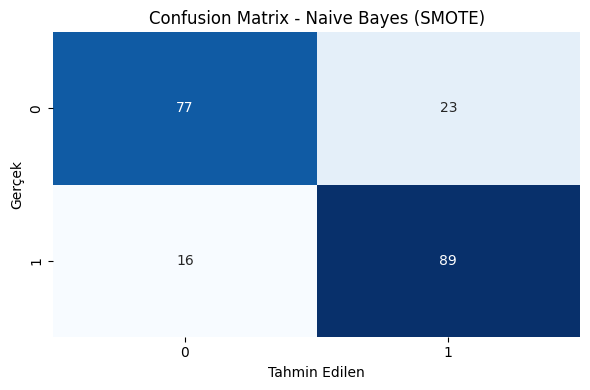

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.85      0.82       105

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205

10-Fold Cross Validation Ortalama F1 Skoru (SMOTE): 0.8410


In [64]:
# Confusion Matrix hesapla
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Naive Bayes (SMOTE)")
plt.tight_layout()
plt.show()

print("Classification Report (SMOTE):\n", classification_report(y_test, y_pred_smote))

# 10-fold cross validation F1 skoru SMOTE sonrası eğitim verisiyle
f1_scores_smote = cross_val_score(nb_smote, X_train_res, y_train_res, cv=10, scoring='f1')
print(f"10-Fold Cross Validation Ortalama F1 Skoru (SMOTE): {f1_scores_smote.mean():.4f}")


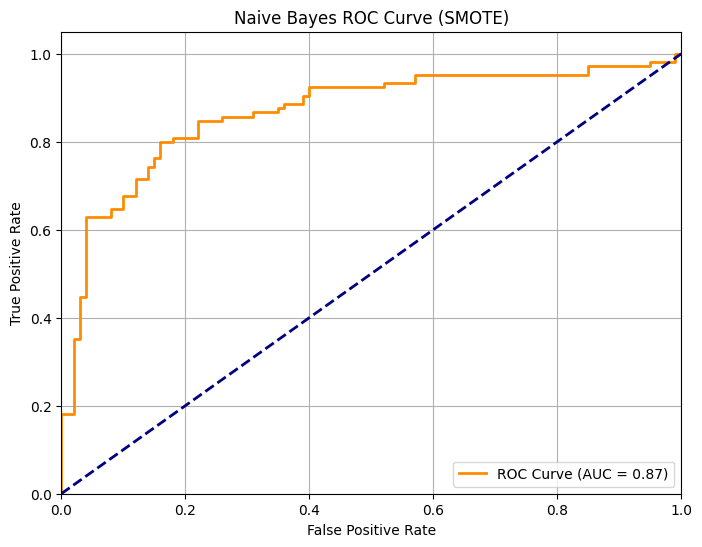

In [65]:
from sklearn.metrics import roc_curve, auc

# Tahmin olasılıklarını al (pozitif sınıfın olasılığı)
y_prob_smote = nb_smote.predict_proba(X_test)[:, 1]

# ROC eğrisi için False Positive Rate (FPR) ve True Positive Rate (TPR) hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob_smote)

# AUC (Area Under Curve) hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve (SMOTE)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#### 3-) ADABOOST

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Grid Search ile en iyi parametreleri bulmak (SMOTE sonrası veri ile)
ada_smote = AdaBoostClassifier(random_state=42, algorithm='SAMME')

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search_smote = GridSearchCV(ada_smote, param_grid, cv=5, scoring='f1')
grid_search_smote.fit(X_train_res, y_train_res)

print("AdaBoost (SMOTE) en iyi parametreler:", grid_search_smote.best_params_)

best_params_smote = grid_search_smote.best_params_

# En iyi parametrelerle model oluştur
best_ada_smote = AdaBoostClassifier(
    learning_rate=best_params_smote['learning_rate'],
    n_estimators=best_params_smote['n_estimators'],
    random_state=42,
    algorithm='SAMME'
)

# Modeli SMOTE sonrası eğitim verisiyle eğit
best_ada_smote.fit(X_train_res, y_train_res)

# Test setinde tahmin yap
y_pred_smote = best_ada_smote.predict(X_test)

# Performans raporu ve karışıklık matrisi
print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

print("Confusion Matrix (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))

AdaBoost (SMOTE) en iyi parametreler: {'learning_rate': 1, 'n_estimators': 200}
Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.90      0.93      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

Confusion Matrix (SMOTE):
[[89 11]
 [ 7 98]]


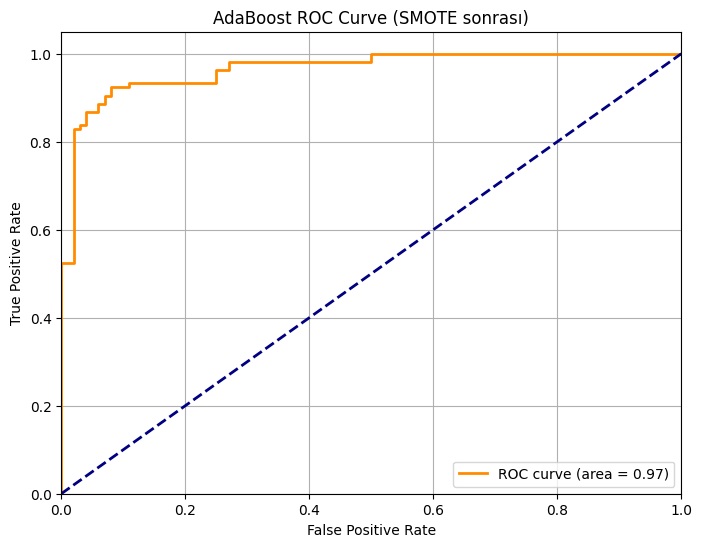

In [67]:
# ROC eğrisi için olasılık tahminlerini al (pozitif sınıf)
y_prob_smote = best_ada_smote.predict_proba(X_test)[:, 1]

# ROC için FPR ve TPR hesapla
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

# AUC hesapla
roc_auc_smote = auc(fpr_smote, tpr_smote)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve (SMOTE sonrası)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### 1-) Özellik Mühendisliği uygulanarak model performansı karşılaştırılacaktır.
#### Mevcut sütunlardan yeni bilgiler üretilerek modelin performansına nasıl etkisi olacağının incelenmesi amaçlanmaktadır.

In [12]:
df7.head()

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0  0.479167    1  0.292453  0.196347    0  0.740458      0  0.161290   2   
1  0.500000    1  0.433962  0.175799    1  0.641221      1  0.500000   0   
2  0.854167    1  0.481132  0.109589    0  0.412214      1  0.419355   0   
3  0.666667    1  0.509434  0.175799    0  0.687023      0  0.000000   1   
4  0.687500    0  0.415094  0.383562    1  0.267176      0  0.306452   3   

   target  ...  restecg_0  restecg_1  restecg_2  slope_0  slope_1  slope_2  \
0       0  ...          0          1          0        0        0        1   
1       0  ...          1          0          0        1        0        0   
2       0  ...          0          1          0        1        0        0   
3       0  ...          0          1          0        0        0        1   
4       0  ...          0          1          0        0        1        0   

   thal_0  thal_1  thal_2  thal_3  
0       0       0       0       1  
1       0       0       0       1  
2       0       0       0       1  
3       0       0       0       1  
4       0       0       1       0  

[5 rows x 24 columns]

In [13]:
import numpy as np

# Feature Engineering
df7['age_thalach_ratio'] = df7['age'] / df7['thalach']
df7['oldpeak_exang'] = df7['oldpeak'] * df7['exang']

# slope sütunlarını tek bir sütuna dönüştür
df7['slope'] = df7[['slope_0', 'slope_1', 'slope_2']].idxmax(axis=1).str[-1].astype(int)
df7.drop(['slope_0', 'slope_1', 'slope_2'], axis=1, inplace=True)

df7['slope_oldpeak'] = df7['slope'] * df7['oldpeak']

# Sonsuz değerleri NaN yap
df7.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN değerleri sütun ortalamaları ile doldur
df7.fillna(df7.mean(), inplace=True)

In [14]:
df7.head()

age  sex  trestbps      chol  fbs   thalach  exang   oldpeak  ca  \
0  0.479167    1  0.292453  0.196347    0  0.740458      0  0.161290   2   
1  0.500000    1  0.433962  0.175799    1  0.641221      1  0.500000   0   
2  0.854167    1  0.481132  0.109589    0  0.412214      1  0.419355   0   
3  0.666667    1  0.509434  0.175799    0  0.687023      0  0.000000   1   
4  0.687500    0  0.415094  0.383562    1  0.267176      0  0.306452   3   

   target  ...  restecg_1  restecg_2  thal_0  thal_1  thal_2  thal_3  \
0       0  ...          1          0       0       0       0       1   
1       0  ...          0          0       0       0       0       1   
2       0  ...          1          0       0       0       0       1   
3       0  ...          1          0       0       0       0       1   
4       0  ...          1          0       0       0       1       0   

   age_thalach_ratio  oldpeak_exang  slope  slope_oldpeak  
0           0.647122       0.000000      2       0.322581  
1           0.779762       0.500000      0       0.000000  
2           2.072145       0.419355      0       0.000000  
3           0.970370       0.000000      2       0.000000  
4           2.573214       0.000000      1       0.306452  

[5 rows x 25 columns]

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


# Özellikler ve hedef değişken
X = df7.drop("target", axis=1)
y = df7["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### 1-) LOJİSTİK REGRESYON

En iyi parametreler: {'C': 1, 'penalty': 'l2'}
Test Seti Doğruluk: 0.848780487804878
Test Seti Precision: 0.8135593220338984
Test Seti Recall: 0.9142857142857143
Test Seti F1 Score: 0.8609865470852018


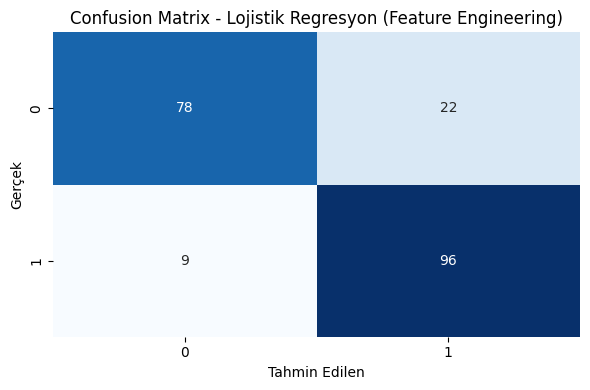

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83       100
           1       0.81      0.91      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Lojistik regresyon modeli
log_reg_2 = LogisticRegression(solver='liblinear')

# Hiperparametreler
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# GridSearchCV ile en iyi parametreleri bul
grid_search_2 = GridSearchCV(log_reg_2, param_grid, cv=5, scoring='f1')
grid_search_2.fit(X_train, y_train)

# En iyi model
best_log_reg_2 = grid_search_2.best_estimator_
print("En iyi parametreler:", grid_search_2.best_params_)

# Test verisi ile tahmin
y_pred_2 = best_log_reg_2.predict(X_test)

# Performans ölçümleri
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred_2))
print("Test Seti Precision:", precision_score(y_test, y_pred_2))
print("Test Seti Recall:", recall_score(y_test, y_pred_2))
print("Test Seti F1 Score:", f1_score(y_test, y_pred_2))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_2)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Lojistik Regresyon (Feature Engineering)")
plt.tight_layout()
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred_2))

In [17]:
import numpy as np

print(np.any(np.isnan(X_train)))  # NaN var mı?
print(np.any(np.isinf(X_train)))  # sonsuz değer var mı?


False
False


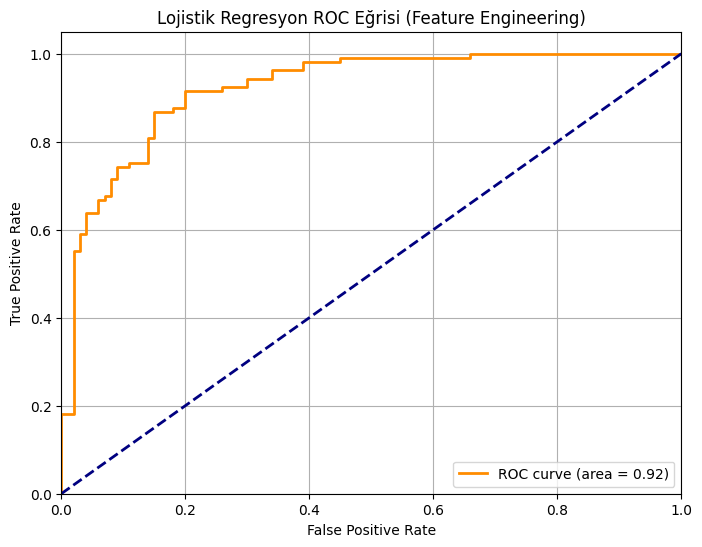

In [18]:
# ROC Eğrisi için olasılık tahminleri (pozitif sınıf)
y_prob_2 = best_log_reg_2.predict_proba(X_test)[:, 1]

# ROC için FPR, TPR hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob_2)

# AUC hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Rastgele tahmin çizgisi
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lojistik Regresyon ROC Eğrisi (Feature Engineering)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### 2-) NAİVE BAYES

Test Seti Doğruluk: 0.775609756097561
Test Seti Precision: 0.743801652892562
Test Seti Recall: 0.8571428571428571
Test Seti F1 Score: 0.7964601769911505


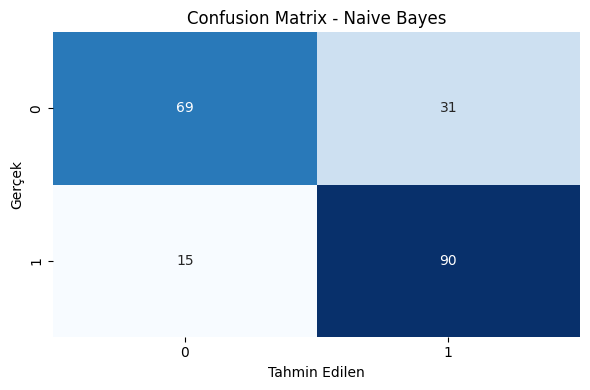

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       100
           1       0.74      0.86      0.80       105

    accuracy                           0.78       205
   macro avg       0.78      0.77      0.77       205
weighted avg       0.78      0.78      0.77       205

10-Fold Cross Validation Ortalama F1 Skoru: 0.8435


In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Model oluştur
nb_2 = GaussianNB()

# Yeni feature engineering verisiyle modeli eğit
nb_2.fit(X_train, y_train)  # SMOTE değil, feature engineering set

# Test seti tahmini
y_pred_2 = nb_2.predict(X_test)

# Performans ölçümleri
print("Test Seti Doğruluk:", accuracy_score(y_test, y_pred_2))
print("Test Seti Precision:", precision_score(y_test, y_pred_2))
print("Test Seti Recall:", recall_score(y_test, y_pred_2))
print("Test Seti F1 Score:", f1_score(y_test, y_pred_2))

# Confusion Matrix hesapla
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

# Confusion Matrix Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_2))

# 10-fold cross validation F1 skoru (feature engineering sonrası veri ile)
f1_scores_2 = cross_val_score(nb_2, X_train, y_train, cv=10, scoring='f1')
print(f"10-Fold Cross Validation Ortalama F1 Skoru: {f1_scores_2.mean():.4f}")

from sklearn.metrics import roc_curve, auc

# Tahmin olasılıklarını al (pozitif sınıfın olasılığı)
y_prob_2 = nb_2.predict_proba(X_test)[:, 1]



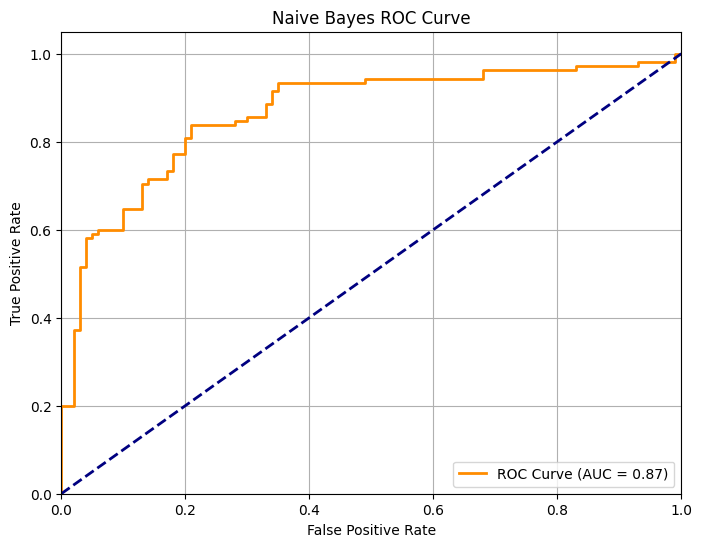

In [20]:
# ROC eğrisi için FPR ve TPR hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob_2)

# AUC hesapla
roc_auc = auc(fpr, tpr)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


#### 3-) ADABOOST

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Grid Search ile en iyi parametreleri bulmak (feature engineering sonrası veri ile)
ada_2 = AdaBoostClassifier(random_state=42, algorithm='SAMME')

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search_2 = GridSearchCV(ada_2, param_grid, cv=5, scoring='f1')
grid_search_2.fit(X_train, y_train)

print("AdaBoost (feature engineering) en iyi parametreler:", grid_search_2.best_params_)

best_params_2 = grid_search_2.best_params_

# En iyi parametrelerle model oluştur
best_ada_2 = AdaBoostClassifier(
    learning_rate=best_params_2['learning_rate'],
    n_estimators=best_params_2['n_estimators'],
    random_state=42,
    algorithm='SAMME'
)

# Modeli eğitim verisiyle eğit
best_ada_2.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred_2 = best_ada_2.predict(X_test)

# Performans raporu ve karışıklık matrisi
print("Classification Report:")
print(classification_report(y_test, y_pred_2))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))



AdaBoost (feature engineering) en iyi parametreler: {'learning_rate': 1, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.91      0.92      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

Confusion Matrix:
[[90 10]
 [ 8 97]]


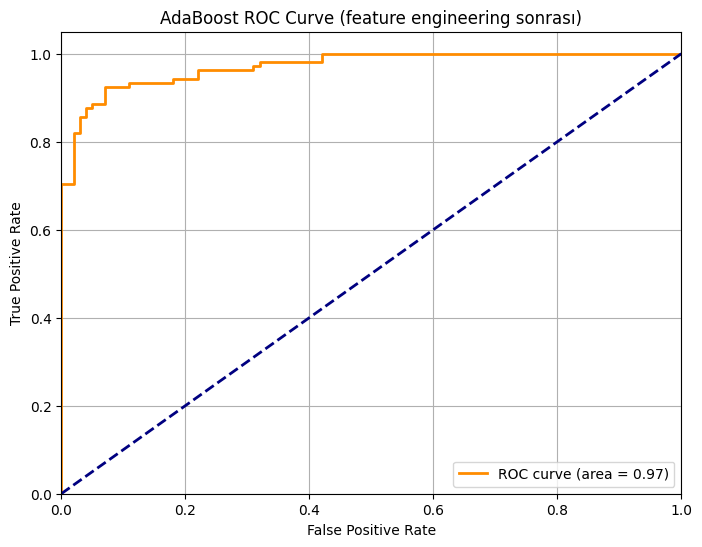

In [22]:

# ROC eğrisi için olasılık tahminlerini al (pozitif sınıf)
y_prob_2 = best_ada_2.predict_proba(X_test)[:, 1]

# ROC için FPR ve TPR hesapla
fpr_2, tpr_2, _ = roc_curve(y_test, y_prob_2)

# AUC hesapla
roc_auc_2 = auc(fpr_2, tpr_2)

# ROC eğrisini çiz
plt.figure(figsize=(8,6))
plt.plot(fpr_2, tpr_2, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve (feature engineering sonrası)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## EN İYİ MODELLERLE SHAP UYGULAMALARI 

### 1. RANDOM FOREST

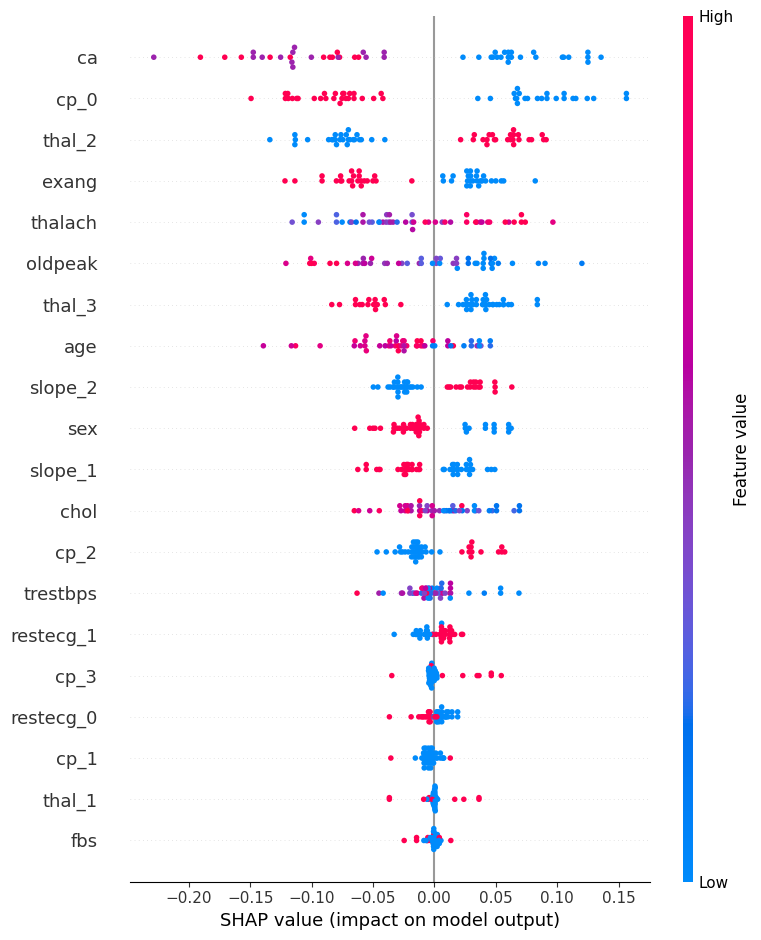

In [40]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# 1. Random Forest modelin daha önce eğitilmiş ve best_rf olarak tanımlanmış olduğunu varsayıyorum

# 2. TreeExplainer ile SHAP açıklayıcısını oluştur
explainer = shap.TreeExplainer(best_rf)

# 3. Test verisinin ilk 50 örneği için SHAP değerlerini hesapla
shap_values = explainer.shap_values(X_test.iloc[:50])

# 4. SHAP değerlerinin numpy array haline getir (eğer shap_values liste ise)
shap_values_array = np.array(shap_values)

# 5. Pozitif sınıfa ait SHAP değerlerini ayıkla (binary classification'da ikinci sınıf genellikle pozitif)
shap_class_1 = shap_values_array[:, :, 1]

# 6. SHAP summary plot'u çiz
shap.summary_plot(shap_class_1, X_test.iloc[:50])

plt.show()


### 2. SUPPORT VECTOR MACHİNE (SVM)

  0%|          | 0/50 [00:00<?, ?it/s]

<class 'numpy.ndarray'>
50
(50, 23, 2)
(50, 23)


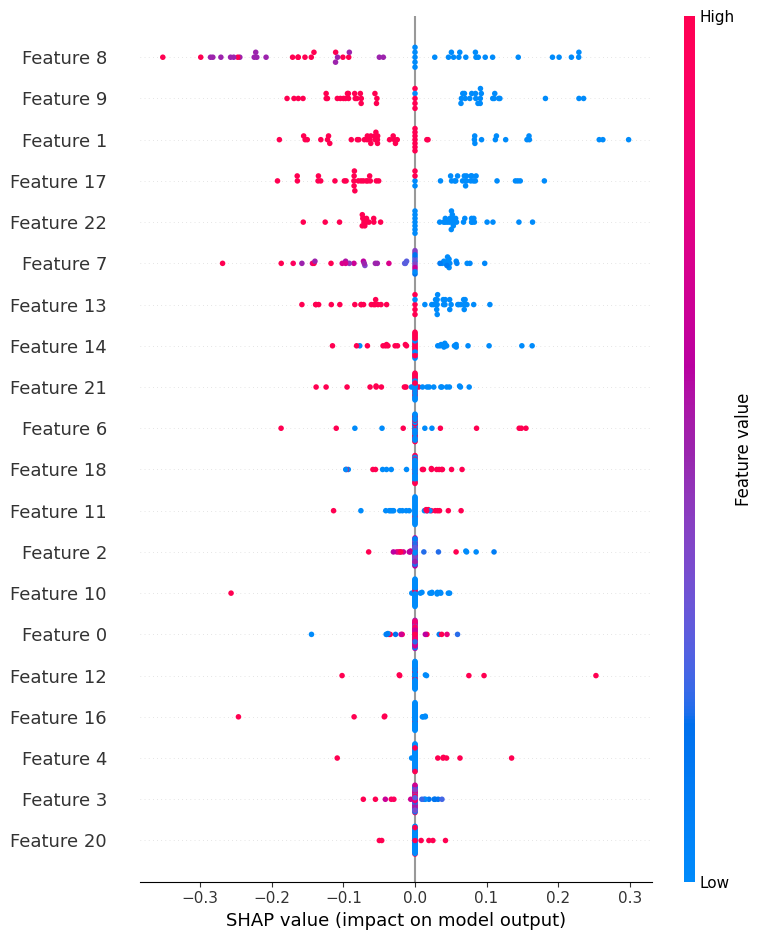

In [46]:
import shap

# KernelExplainer için küçük bir örnek veri seç
background = shap.sample(X_train, 100)  # veya X_train'den küçük bir örnek

# KernelExplainer oluştur (SVM için)
explainer = shap.KernelExplainer(best_svm.predict_proba, background)

# SHAP değerlerini hesapla (50 örnek)
shap_values = explainer.shap_values(X_test.iloc[:50])

# SHAP değerlerinin tipi ve şekli
print(type(shap_values))
print(len(shap_values))  # İkili sınıflandırmada 2 (her sınıf için)
print(np.array(shap_values).shape)  # (2, 50, 23) veya (50, 23) olabilir

# Pozitif sınıfın SHAP değerleri genelde shap_values[1]


shap_class_1 = shap_values[:, :, 1]  # (50, 23)

print(shap_class_1.shape)  # (50, 23) olmalı

# SHAP summary plot çiz




shap.summary_plot(shap_class_1, X_test.iloc[:50].values)


### 3. XGBOOST

shap_values tipi: <class 'numpy.ndarray'>
shap_values shape: (50, 23)
X_test.iloc[:50] shape: (50, 23)


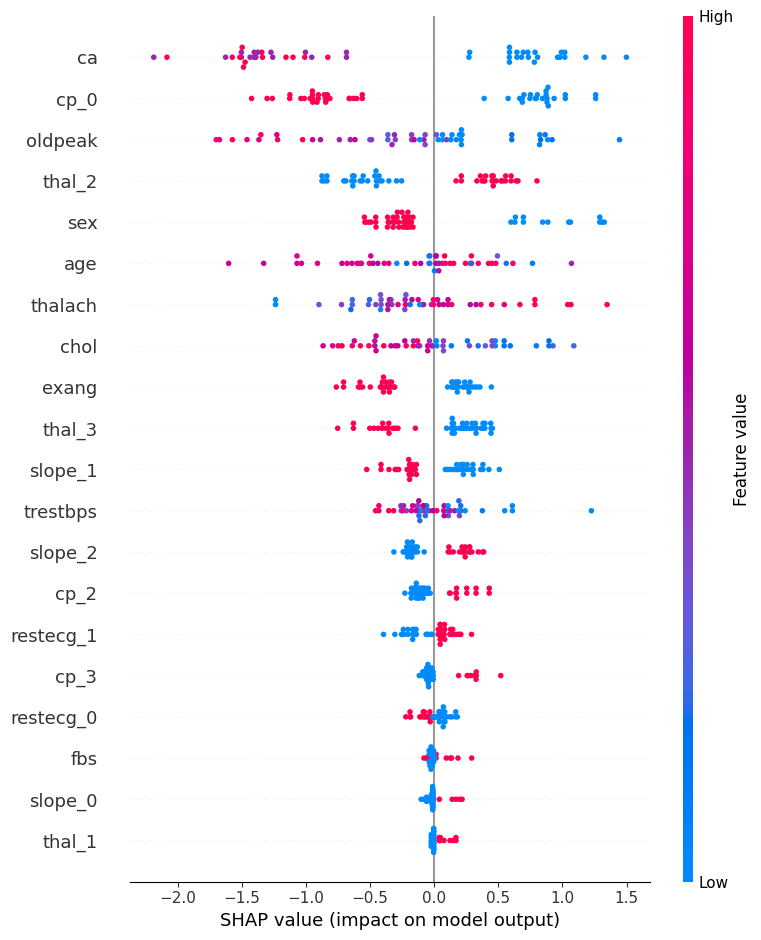

In [50]:
import shap

# 1. Explainer oluştur
explainer = shap.TreeExplainer(best_xgb)

# 2. SHAP değerlerini hesapla (test setinin ilk 50 örneği için)
shap_values = explainer.shap_values(X_test.iloc[:50])

print("shap_values tipi:", type(shap_values))
print("shap_values shape:", shap_values.shape)  # (50, 23) veya (50, 23, 1) gibi bir şey görmelisin
print("X_test.iloc[:50] shape:", X_test.iloc[:50].shape)

# 3. Eğer shap_values üç boyutlu ise (örneğin (50, 23, 1)) squeeze yapabiliriz
if len(shap_values.shape) == 3:
    shap_values = shap_values.squeeze()
    print("Squeezed shap_values shape:", shap_values.shape)

# 4. SHAP summary plot çiz
shap.summary_plot(shap_values, X_test.iloc[:50])

### Birliktelik Analizleri

In [9]:
# Örnek: sayısal ve target sütunlarını çıkar
binary_df = df2.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target'], axis=1)


In [10]:
from mlxtend.frequent_patterns import apriori

# minimum support %10 (0.1) olarak ayarlandı, ihtiyaç varsa değiştir
frequent_itemsets = apriori(binary_df, min_support=0.1, use_colnames=True)

print(frequent_itemsets.head())


    support itemsets
0  0.304390  (sex_0)
1  0.695610  (sex_1)
2  0.484878   (cp_0)
3  0.162927   (cp_1)
4  0.277073   (cp_2)


C:\Users\PC\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [11]:
from mlxtend.frequent_patterns import apriori

# minimum support %10 (0.1) olarak ayarlandı, ihtiyaç varsa değiştir
frequent_itemsets = apriori(binary_df, min_support=0.1, use_colnames=True)

print(frequent_itemsets.head())


    support itemsets
0  0.304390  (sex_0)
1  0.695610  (sex_1)
2  0.484878   (cp_0)
3  0.162927   (cp_1)
4  0.277073   (cp_2)


C:\Users\PC\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
from mlxtend.frequent_patterns import association_rules

# metric olarak 'lift' kullanalım, min_threshold 1.2 (yani 1.2 ve üstü lift değerlerini göster)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


            antecedents                           consequents   support  \
0               (sex_0)                                (cp_2)  0.106341   
1                (cp_2)                               (sex_0)  0.106341   
2               (sex_0)                              (thal_2)  0.245854   
3              (thal_2)                               (sex_0)  0.245854   
4               (sex_1)                              (thal_3)  0.348293   
...                 ...                                   ...       ...   
1265  (slope_2, thal_2)           (fbs_0, exang_0, restecg_1)  0.164878   
1266          (exang_0)   (fbs_0, slope_2, thal_2, restecg_1)  0.164878   
1267        (restecg_1)     (fbs_0, exang_0, slope_2, thal_2)  0.164878   
1268          (slope_2)   (fbs_0, exang_0, thal_2, restecg_1)  0.164878   
1269           (thal_2)  (fbs_0, exang_0, slope_2, restecg_1)  0.164878   

      confidence      lift  
0       0.349359  1.260891  
1       0.383803  1.260891  
2       0.80

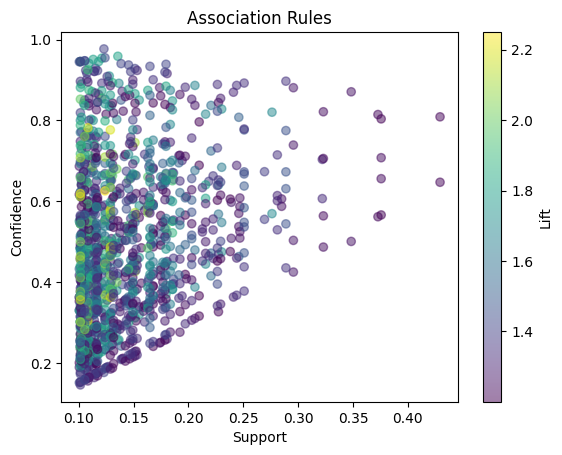

In [15]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()